# WGAN-GP
## Используется для синтеза сигналов для задачи бинарной классификации

In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

import pandas as pd
import uproot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import time
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import auc
from sklearn.utils import shuffle
import matplotlib
import random
import torch.autograd as autograd
#import torchsnooper

In [2]:
torch.manual_seed(111)
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
import numpy as np
import torch
from torch.autograd import Variable
a = Variable(torch.FloatTensor([[1,2,3],[4,5,6]]), requires_grad=True) 
out = a * a
out.backward(a)
print(a.grad)

tensor([[ 2.,  8., 18.],
        [32., 50., 72.]])


In [9]:
import numpy as np
import torch
from torch.autograd import Variable
a = Variable(torch.FloatTensor([[1,2,3],[4,5,6]]), requires_grad=True) 
out = a * a
out.backward(-a)
print(a.grad)

tensor([[ -2.,  -8., -18.],
        [-32., -50., -72.]])


## 1. Загрузка данных

In [3]:
data = pd.read_csv('/Users/zaret/Desktop/gerda/ANG5_cal.csv')

In [4]:
data.drop(data.columns[[0]], axis  = 1, inplace = True)

In [5]:
data

,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,TimeAtHeightX11,...,integral41,integral42,integral43,integral44,integral45,integral46,integral47,integral48,integral,label
0,0.140442,0.181663,0.209801,0.233267,0.253996,0.272972,0.290272,0.306565,0.322181,0.337019,...,0.488790,0.523117,0.562333,0.607231,0.659299,0.719679,0.790533,0.877341,0.486988,1
1,0.045344,0.081330,0.112907,0.140417,0.163945,0.185058,0.205364,0.225947,0.247246,0.269007,...,0.546343,0.567413,0.591851,0.620230,0.655396,0.702594,0.776821,0.883867,0.491816,0
2,0.038847,0.068367,0.092965,0.114875,0.136888,0.162010,0.192348,0.225346,0.258546,0.291481,...,0.515117,0.534861,0.556305,0.580297,0.608701,0.646127,0.703667,0.795487,0.486797,0
3,0.040791,0.058287,0.071423,0.082283,0.092036,0.101343,0.110134,0.118823,0.127419,0.135995,...,0.378054,0.409754,0.439973,0.470333,0.503177,0.542524,0.599320,0.781621,0.688840,0
4,0.060938,0.121147,0.198562,0.247046,0.276288,0.299460,0.320231,0.339979,0.359977,0.381197,...,0.487495,0.505984,0.527094,0.553221,0.588672,0.642007,0.766469,0.885732,0.429769,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81597,0.138779,0.191703,0.233328,0.270243,0.302877,0.331684,0.358398,0.382190,0.404193,0.426089,...,0.438632,0.453070,0.468902,0.487386,0.511292,0.543149,0.598014,0.726106,0.425828,1
81598,0.028672,0.058089,0.087452,0.113082,0.136296,0.161095,0.195494,0.240446,0.272500,0.300394,...,0.583098,0.609487,0.637322,0.666869,0.699748,0.739970,0.794238,0.884338,0.465327,1
81599,0.033797,0.064744,0.093734,0.122582,0.157026,0.204316,0.243169,0.269953,0.292775,0.313781,...,0.422506,0.437654,0.454501,0.472952,0.493773,0.518713,0.552330,0.616205,0.511628,1
81600,0.029680,0.047934,0.061086,0.072907,0.081959,0.091011,0.099646,0.106860,0.114075,0.121290,...,0.265650,0.286738,0.308949,0.332515,0.360004,0.393349,0.440645,0.711360,0.742172,1


In [6]:
data = data.sort_values(by ='integral', ascending = 0)
data = data.reset_index()
data.drop(data.columns[[0]], axis  =1, inplace = True)

In [7]:
sig = data[data['label']==1]
bkg = data[data['label']==0]

In [8]:
sig = shuffle(sig)
bkg = shuffle(bkg)

Text(0.5, 1.0, 'ANG5')

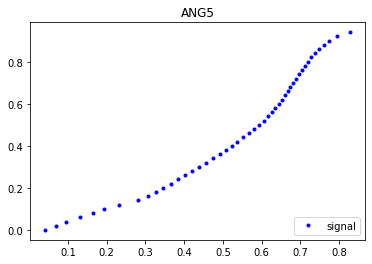

In [9]:
yList = [x*0.02 for x in range(48)] 
xList = sig.iloc[sig.shape[0]-1,:48]
plt.plot(xList,yList,'.', color='blue',
             label = 'signal')
plt.legend(loc = 'lower right')
plt.title('ANG5')

Text(0.5, 1.0, 'ANG5')

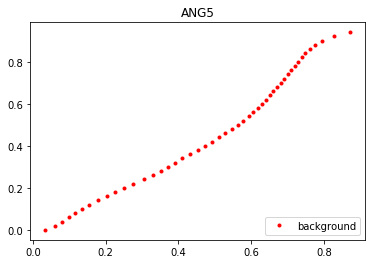

In [10]:
yList = [x*0.02 for x in range(48)] 
xList = bkg.iloc[101,:48]
plt.plot(xList,yList,'.', color='red',
             label = 'background')
plt.legend(loc = 'lower right')
plt.title('ANG5')

In [11]:
sig['derivative1']

72016    0.415880
54324    0.339325
44719    0.578833
74003    0.407958
76461    0.501014
           ...   
60724    0.415667
1886     1.325600
8140     0.444223
16603    0.831917
61704    0.480538
Name: derivative1, Length: 40801, dtype: float64

In [12]:
sig['TimeAtHeightX2']

72016    0.048091
54324    0.058941
44719    0.034552
74003    0.049025
76461    0.039919
           ...   
60724    0.048115
1886     0.015088
8140     0.045022
16603    0.024041
61704    0.041620
Name: TimeAtHeightX2, Length: 40801, dtype: float64

In [13]:
sig_diff = sig.loc[:]
bkg_diff = bkg.loc[:]

### В исходных данных избыточное число параметров, удаляем ненужные и разбиваем данные на 2 датасета: TimeAtHeightX[i]  и derivative[i] (derivative[i] изначально вычислялся из TimeAtHeightX[i])

In [14]:
sig = sig.drop('integral', axis = 1)
bkg = bkg.drop('integral', axis = 1)

sig_diff = sig_diff.drop('integral', axis = 1)
bkg_diff = bkg_diff.drop('integral', axis = 1)

In [15]:
for i in range (1,49):
    sig.drop('integral'+str(i), axis = 1, inplace = True)
    bkg.drop('integral'+str(i), axis = 1, inplace = True)
    
for i in range (1,49):
    sig_diff.drop('integral'+str(i), axis = 1, inplace = True)
    bkg_diff.drop('integral'+str(i), axis = 1, inplace = True)

In [16]:
for i in range (1,50):
    sig.drop('derivative'+str(i), axis = 1, inplace = True)
    bkg.drop('derivative'+str(i), axis = 1, inplace = True)

In [17]:
for i in range (2,50):
    sig_diff.drop('TimeAtHeightX'+str(i), axis = 1, inplace = True)
    bkg_diff.drop('TimeAtHeightX'+str(i), axis = 1, inplace = True)
    
sig_diff = sig_diff.drop('derivative49', axis = 1)
bkg_diff = bkg_diff.drop('derivative49', axis = 1)

In [18]:
sig = sig.drop('label', axis = 1)
bkg = bkg.drop('label', axis = 1)



sig_diff = sig_diff.drop('label', axis = 1)
bkg_diff = bkg_diff.drop('label', axis = 1)

In [19]:
sig = sig.reset_index()
sig.drop(sig.columns[[0]], axis  =1, inplace = True)

bkg = bkg.reset_index()
bkg.drop(bkg.columns[[0]], axis  =1, inplace = True)

sig_diff = sig_diff.reset_index()
sig_diff.drop(sig_diff.columns[[0]], axis  =1, inplace = True)

bkg_diff = bkg_diff.reset_index()
bkg_diff.drop(bkg_diff.columns[[0]], axis  =1, inplace = True)

In [20]:
sig = sig.drop(index = 807)
sig_diff = sig_diff.drop(index = 807)

In [21]:
sig

,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,TimeAtHeightX11,...,TimeAtHeightX40,TimeAtHeightX41,TimeAtHeightX42,TimeAtHeightX43,TimeAtHeightX44,TimeAtHeightX45,TimeAtHeightX46,TimeAtHeightX47,TimeAtHeightX48,TimeAtHeightX49
0,0.048091,0.086083,0.123181,0.166869,0.207868,0.240557,0.271537,0.301114,0.329130,0.355287,...,0.746583,0.756036,0.766445,0.777599,0.789925,0.804226,0.821171,0.842776,0.871528,0.913762
1,0.058941,0.097701,0.127602,0.156337,0.184947,0.210835,0.233982,0.255397,0.275783,0.295528,...,0.667689,0.683768,0.701465,0.720681,0.741892,0.767610,0.798989,0.833997,0.870177,0.913228
2,0.034552,0.061593,0.086920,0.111769,0.135916,0.158831,0.181136,0.203485,0.225766,0.247547,...,0.655644,0.664553,0.673683,0.683902,0.695215,0.708043,0.723900,0.744687,0.772674,0.821510
3,0.049025,0.077478,0.101279,0.126137,0.156455,0.191494,0.225791,0.260090,0.297805,0.338905,...,0.785281,0.796388,0.808102,0.820542,0.834114,0.849362,0.866427,0.886052,0.909749,0.940032
4,0.039919,0.074754,0.109681,0.144796,0.190997,0.251074,0.300808,0.346229,0.379017,0.402468,...,0.774879,0.785049,0.796581,0.809134,0.823016,0.838620,0.856421,0.877121,0.901621,0.933022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40796,0.048115,0.085328,0.116184,0.143501,0.169863,0.195886,0.221076,0.245592,0.268925,0.290923,...,0.710307,0.719160,0.728751,0.738623,0.750333,0.763590,0.779902,0.802005,0.834405,0.899459
40797,0.015088,0.026251,0.035917,0.044608,0.052590,0.060047,0.067131,0.073966,0.080655,0.087419,...,0.407461,0.415853,0.424476,0.433860,0.444974,0.461174,0.501068,0.542918,0.593426,0.776587
40798,0.045022,0.068527,0.086778,0.102484,0.116747,0.130220,0.143135,0.155434,0.167347,0.179003,...,0.444232,0.456572,0.470585,0.485986,0.503487,0.524272,0.549971,0.581778,0.616531,0.671883
40799,0.024041,0.040345,0.054039,0.066123,0.077093,0.087763,0.097804,0.107814,0.117566,0.127318,...,0.600118,0.622838,0.645673,0.669752,0.696883,0.731589,0.778257,0.821428,0.866305,0.928666


In [22]:
bkg = bkg.drop(index = 807)
bkg_diff = bkg_diff.drop(index = 807)

In [23]:
bkg_diff

,derivative1,derivative2,derivative3,derivative4,derivative5,derivative6,derivative7,derivative8,derivative9,derivative10,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
0,0.416925,0.795602,0.921769,0.955163,0.963597,0.998286,1.062941,1.124753,1.147485,1.128297,...,1.196954,1.120098,0.973591,0.811916,0.704931,0.702497,0.710152,0.643525,0.530518,0.446182
1,0.736288,1.027198,1.246746,1.399928,1.542612,1.670302,1.714231,1.800304,1.809815,1.828237,...,1.415452,1.452739,1.455121,1.415952,1.358059,1.237911,1.082632,0.916552,0.662090,0.272846
2,0.663864,1.071215,1.324838,1.640647,1.788466,2.045667,2.046159,2.355595,2.355595,2.393453,...,1.396153,1.238017,1.138773,1.015752,0.871687,0.731159,0.616795,0.518756,0.418788,0.206009
3,1.037350,1.313647,1.529797,1.720774,1.918763,2.023435,2.134270,2.259717,2.298453,2.398426,...,1.182354,1.019464,0.876289,0.692061,0.497398,0.342082,0.326816,0.393434,0.421857,0.341081
4,0.480339,0.484994,0.642831,0.854630,0.921793,0.874511,0.724768,0.597186,0.534148,0.470224,...,1.915484,1.898754,1.844538,1.788628,1.612666,1.469914,1.281573,1.065009,0.885494,0.764943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40796,0.994099,1.292832,1.515987,1.663621,1.756450,1.810555,1.812159,1.757167,1.679620,1.586529,...,1.630462,1.666112,1.675170,1.653343,1.595177,1.480299,1.307493,1.068931,0.821675,0.548328
40797,0.541258,0.786032,0.886489,0.917224,0.946459,0.976461,0.983511,0.942017,0.864493,0.769279,...,1.513962,1.500489,1.461725,1.390717,1.274844,1.111880,0.945576,0.828192,0.721730,0.579689
40798,0.307369,1.077072,1.561523,1.804267,1.975512,2.072400,2.090346,2.098109,2.092805,2.089093,...,0.910280,0.906086,0.956595,0.994824,0.988571,0.942462,0.907914,0.879697,0.814835,0.663359
40799,0.151132,0.597117,0.877018,1.150651,1.394074,1.624331,1.921095,2.067071,2.204469,2.405151,...,0.987247,0.988688,0.895076,0.750338,0.689672,0.805113,0.835282,0.672658,0.418339,0.434963


In [24]:
sig = sig.reset_index()
sig.drop(sig.columns[[0]], axis  =1, inplace = True)

bkg = bkg.reset_index()
bkg.drop(bkg.columns[[0]], axis  =1, inplace = True)

### Заряд (в координатах TimeAtHeightX[i], yList=[x*0.02 for x in range(48)])

Text(0.5, 1.0, 'ANG5')

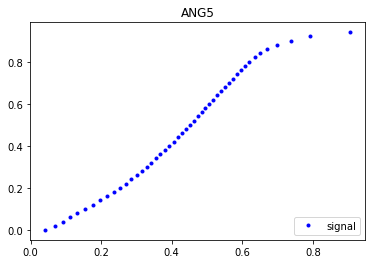

In [41]:
yList = [x*0.02 for x in range(48)] ###
xList = sig.iloc[55,:48]
plt.plot(xList,yList,'.', color='blue',
             label = 'signal')
plt.legend(loc = 'lower right')
plt.title('ANG5')

### Ток (в координатах derivative[i], TimeAtHeightX[i])

Text(0.5, 1.0, 'ANG5')

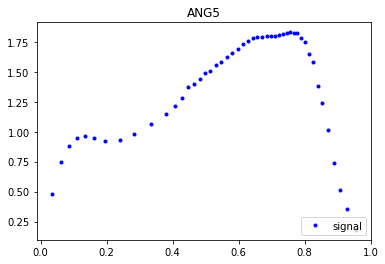

In [42]:
yList = sig_diff.iloc[55,:]
xList = sig.iloc[101,:]
plt.plot(xList,yList,'.', color='blue',
             label = 'signal')
plt.legend(loc = 'lower right')
plt.title('ANG5')

In [29]:
sig1 = sig.loc[:]
bkg1 = bkg.loc[:]

In [30]:
sig = sig_diff.loc[:]  # переопределили для удобства, так как в дальнейшем будут использоваться только derivative[i]
bkg = bkg_diff.loc[:]

In [31]:
bkg

,derivative1,derivative2,derivative3,derivative4,derivative5,derivative6,derivative7,derivative8,derivative9,derivative10,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
0,0.471069,0.718525,0.755505,0.691871,0.743166,0.894457,0.996129,1.023563,1.025596,1.039407,...,1.959316,1.860803,1.764157,1.659634,1.535742,1.368621,1.153101,0.924245,0.690848,0.465425
1,0.437913,0.436002,0.811840,0.785517,0.449435,0.462198,0.685756,0.629043,0.528980,0.723203,...,2.617667,2.541806,2.495196,2.286831,2.171094,1.888812,1.557118,1.191881,0.707702,0.435167
2,0.620090,0.848952,1.023422,1.096653,1.102812,1.058431,0.999066,0.976759,1.012669,1.084329,...,1.408814,1.399829,1.374520,1.326247,1.240913,1.107549,0.929348,0.734448,0.604945,0.520719
3,0.736969,1.059013,1.294552,1.437862,1.548181,1.725798,1.760167,1.899851,1.924883,2.029463,...,1.258979,1.129923,0.988348,0.839294,0.673737,0.527437,0.405686,0.224033,0.210102,0.230134
4,0.512456,0.967668,1.146832,1.156724,1.039411,0.879957,0.868537,0.996868,1.136003,1.194451,...,1.606842,1.536772,1.448579,1.312041,1.111221,0.867498,0.753628,0.782837,0.705616,0.249180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40796,0.575058,0.780001,0.966785,1.096023,1.188757,1.246996,1.282976,1.298622,1.295471,1.271142,...,1.695610,1.651061,1.599610,1.485554,1.390112,1.262021,1.083339,0.867600,0.680418,0.483763
40797,0.732424,1.196026,1.497069,1.834658,1.976351,2.157558,2.285464,2.398443,2.456247,2.540505,...,0.839466,0.897236,0.920484,0.912577,0.897523,0.874686,0.782092,0.556981,0.251417,0.140656
40798,0.639435,0.734811,0.763259,0.807838,0.910828,0.996688,1.041132,1.027216,0.967206,0.953455,...,2.118984,2.092070,2.025327,1.905380,1.804646,1.606647,1.386949,1.157453,0.861907,0.527145
40799,0.885818,1.231294,1.452597,1.659991,1.765909,1.824706,1.893940,1.900875,1.910418,1.905343,...,0.732663,0.692038,0.668892,0.646645,0.642963,0.663576,0.649124,0.542380,0.420732,0.398214


## 2. Подготовка
### Все следующие шаги осуществляются отдельно для sig/bkg

In [32]:
print ('input sig/bkg')
name = input()

if (name=='sig'):
    line = 'signal'
if (name == 'bkg'):
    line = 'background'

input sig/bkg
bkg


In [33]:
if (name=='sig'):
    arr = np.array(sig)
if (name == 'bkg'):
    arr = np.array(bkg)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
arr = scaler.fit_transform(arr) 

In [35]:
arr.shape

(40800, 48)

In [36]:
train_data_length = arr.shape[0]
train_data = torch.zeros((train_data_length,48))
train_data = torch.tensor(arr, dtype=torch.float)
train_labels = torch.zeros(train_data_length,1)

train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [37]:
train_data.shape

torch.Size([40800, 48])

In [38]:
train_labels.shape

torch.Size([40800, 1])

In [39]:
def batch(number):
    A=[]
    if (number <100):
        k = int(number/2)
    else:
        k = 110
    for i in range (1,k):
        if (number%i == 0):
            A.append(i)
            
    print(A[len(A)-1])
    return A[len(A)-1]

In [40]:
batch_size = 64

In [41]:
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True, drop_last=True
)

In [42]:
train_loader

## 3. Discriminator

In [43]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(48, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 1),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [44]:
netD = Discriminator()

In [45]:
print(netD)

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=48, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)


## 4. Generator

In [46]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fcnet = nn.Sequential(
            torch.nn.Linear(24, 28),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(28, 36),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(36, 40),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(40, 44),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(44, 48),
        )
        
    # @torchsnooper.snoop()
    def forward(self, inputs):
        x = self.fcnet(inputs)
        return x

In [47]:
netG = Generator()

In [48]:
print(netG)

Generator(
  (fcnet): Sequential(
    (0): Linear(in_features=24, out_features=28, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=28, out_features=36, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=36, out_features=40, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=40, out_features=44, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=44, out_features=48, bias=True)
  )
)


## 5. Обучение

In [49]:
lr = 1e-4

In [50]:
optimizerD = torch.optim.Adam(netD.parameters(), lr=lr)
optimizerG = torch.optim.Adam(netG.parameters(), lr=lr)
loss_G=[]
loss_D=[]
epochs = []

G_losses = []
D_losses = []

one = torch.tensor(1, dtype=torch.float)
mone = one * -1
one = one.to(DEVICE)
mone = mone.to(DEVICE)

ITERS = 50000
CRITIC_ITERS = 5

In [51]:
minim_G = 10**9
maxim_D = -10**9  # these values are used to find the epoch, where G_loss is the least.

n_critic = 5

def inf_train_gen():
    while True:
        for images,targets in train_loader:
            yield images

In [52]:
LAMBDA = 10

def calc_gradient_penalty(netD, real_data, fake_data):
    #print real_data.size()
    alpha = torch.rand(batch_size, 1)
    alpha = alpha.expand(real_data.size())
    alpha = alpha.to(DEVICE)

    interpolates = alpha * real_data + ((1 - alpha) * fake_data)

    interpolates = interpolates.to(DEVICE)
    interpolates = autograd.Variable(interpolates, requires_grad=True)

    disc_interpolates = netD(interpolates)

    gradients = autograd.grad(outputs=disc_interpolates, inputs=interpolates,
                              grad_outputs=torch.ones(disc_interpolates.size()).to(DEVICE),
                              create_graph=True, retain_graph=True, only_inputs=True)[0]

    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean() * LAMBDA
    return gradient_penalty

In [53]:
random_dim = 24
netD = netD.to(DEVICE)
netG = netG.to(DEVICE)
data = inf_train_gen()
for iteration in range(ITERS):
    epochs.append(iteration)
    start_time = time.time()
    ############################
    # (1) Update D network
    ###########################
    for p in netD.parameters():  # reset requires_grad
        p.requires_grad = True  # they are set to False below in netG update

    for iter_d in range(CRITIC_ITERS):
        _data = next(data)
        real_data = torch.Tensor(_data)
        real_data = real_data.to(DEVICE)
        real_data_v = autograd.Variable(real_data).to(DEVICE)

        netD.zero_grad()

        # train with real
        D_real = netD(real_data_v)
        D_real = D_real.mean()
        # print D_real
        D_real.backward(mone)

        # train with fake
        noise = torch.randn(batch_size, random_dim).to(DEVICE)
        fake = netG(noise).detach()
        inputv = fake
        D_fake = netD(inputv)
        D_fake = D_fake.mean()
        D_fake.backward(one)

        # train with gradient penalty
        gradient_penalty = calc_gradient_penalty(netD, real_data_v.data, fake.data)
        gradient_penalty.backward()

        D_cost = D_fake - D_real + gradient_penalty
        Wasserstein_D = D_real - D_fake
        optimizerD.step()
        
    loss_D.append(D_cost.item())

    ############################
    # (2) Update G network
    ###########################
    for p in netD.parameters():
        p.requires_grad = False  # to avoid computation
    netG.zero_grad()

    _data = next(data)
    noise = torch.randn(batch_size, random_dim).to(DEVICE)
    noisev = autograd.Variable(noise).to(DEVICE)
    fake = netG(noisev)
    G = netD(fake)
    G = G.mean()
    G.backward(mone)
    G_cost = -G
    loss_G.append(G_cost.item())
    optimizerG.step()
    if iteration%1000 == 0:
        print(D_cost.item(),G_cost.item())

9.685596466064453 -0.1644364297389984
-5.410578727722168 -0.6869739294052124
-2.3447439670562744 -0.35214662551879883
-1.3617494106292725 0.2243385910987854
-1.2612961530685425 -0.3357168436050415
-1.4019943475723267 -0.21744221448898315
-1.173823595046997 -1.326690435409546
-1.0685956478118896 -2.593839168548584
-1.0928964614868164 -3.103264808654785
-1.1453664302825928 -3.959852695465088
-0.6685410737991333 -2.270061731338501
-0.6867485046386719 -2.1355783939361572
-1.0548794269561768 -3.3415558338165283
-0.8179882764816284 -4.174227714538574
-1.312274694442749 -4.921428680419922
-1.0076963901519775 -1.8520839214324951
-0.5125219821929932 -3.6619772911071777
-1.089660882949829 -2.587164878845215
-0.8027110695838928 -3.6525278091430664
-1.2298357486724854 -3.5774154663085938
-0.5273924469947815 -3.465688705444336
-0.8801965713500977 -2.4062700271606445
-1.466462254524231 -2.242766857147217
-0.749720573425293 -3.8084964752197266
-1.356408715248108 -5.445216655731201
-0.6536056995391846

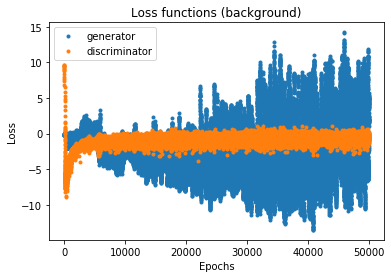

In [54]:
plt.plot(epochs, loss_G, '.', label='generator')
plt.plot(epochs, loss_D, '.',  label='discriminator')
plt.title('Loss functions ('+line+')')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [55]:
torch.save(netG.state_dict(), 'model_' +name+'.pth')

In [56]:
####################

In [57]:
netG.load_state_dict(torch.load('model_' +name+'.pth'))

<All keys matched successfully>

In [58]:
latent_space_samples = torch.randn(100, random_dim).to(DEVICE)
generated_samples = netG(latent_space_samples)

In [59]:
generated_samples = scaler.inverse_transform(generated_samples.cpu().data.numpy())

In [62]:
generated_samples

array([[ 0.8839555 ,  1.1844246 ,  1.4031022 , ...,  0.6611547 ,
         0.45995402,  0.13903692],
       [ 0.12809542, -0.18273848, -0.16114688, ...,  1.2179134 ,
         1.0226141 ,  0.61424685],
       [ 0.46916184,  0.6264495 ,  0.6888661 , ...,  1.166948  ,
         0.80521256,  0.4051031 ],
       ...,
       [ 0.45495182,  0.801446  ,  0.98060775, ...,  0.48332065,
         0.40524134,  0.23559096],
       [ 0.1310519 ,  0.5585345 ,  0.78052676, ...,  1.2305185 ,
         1.1952664 ,  0.8985646 ],
       [ 0.4468323 ,  0.5369055 ,  0.6568297 , ...,  0.9006672 ,
         0.74948967,  0.5374669 ]], dtype=float32)

In [63]:
generated_samples.shape

(100, 48)

##  6. Синтез данных и их сохранение в file.csv

In [50]:
generator = Generator()

In [51]:
generator.load_state_dict(torch.load('model_' +name+'.pth'))

<All keys matched successfully>

In [53]:
latent_space_samples = torch.randn(60000, random_dim)
generated_samples = generator(latent_space_samples)

In [54]:
generated_samples.shape

torch.Size([60000, 48])

In [55]:
generated_samples = generated_samples.detach()

In [56]:
generated_samples = scaler.inverse_transform(generated_samples)

In [57]:
generated_samples = np.array(generated_samples)

In [58]:
generated_samples

array([[0.35871485, 0.9556235 , 1.274015  , ..., 0.6968332 , 0.4385763 ,
        0.32576433],
       [0.47528705, 0.3910245 , 0.31512958, ..., 1.4634048 , 0.99598455,
        0.59216714],
       [0.49125314, 0.66880655, 0.7913314 , ..., 0.8075401 , 0.56112826,
        0.26304463],
       ...,
       [0.43907267, 0.6769614 , 0.82662445, ..., 0.6770078 , 0.62881696,
        0.44890615],
       [1.1501434 , 1.2495402 , 1.3371301 , ..., 0.80155635, 0.5248908 ,
        0.52778053],
       [0.47805274, 0.4814792 , 0.5607351 , ..., 0.8891264 , 0.698332  ,
        0.604742  ]], dtype=float32)

In [59]:
def form_names(h):
    B = []
    C=[]
    D=[]
    s = 'TimeAtHeightX'
    p='derivative'
    t = 'integral'
    for i in range(h):
        s1 = s+str(i+1)
        B.append(s1)
    for j in range(h-2):
        p1 = p+str(j+1)
        C.append(p1)
    
    for k in range(h-2):
        t1 = t+str(k+1)
        D.append(t1)
    return B, C, D

In [60]:
def torch_dataframes_cur(samples):
    _,A,_ = form_names(50)
    df = pd.DataFrame()

    for i in range (48):################
        tmp = []
        for j in range (samples.shape[0]):
            tmp.append(samples[j][i])
        df[A[i - 48]] = tmp
    return df

In [61]:
def torch_dataframes_ch(samples):
    #samples = samples.detach().numpy()
    A,_,_ = form_names(50)
    zeros = [0 for x in range (samples.shape[0])]
    ones = [1 for x in range (samples.shape[0])]
    df = pd.DataFrame()
    df[A[0]] = zeros

    for i in range (48): ##########
        tmp = []
        for j in range (samples.shape[0]):
            tmp.append(samples[j][i])
        df[A[i+1]] = tmp
    df[A[49]] = ones
    return df

In [62]:
samples_current = torch_dataframes_cur(generated_samples)

In [63]:
samples_current

,derivative1,derivative2,derivative3,derivative4,derivative5,derivative6,derivative7,derivative8,derivative9,derivative10,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
0,0.358715,0.955624,1.274015,1.430122,1.524405,1.675870,1.803691,1.943566,1.999678,2.155385,...,1.341480,1.108015,0.963341,0.851557,0.728231,0.745526,0.765684,0.696833,0.438576,0.325764
1,0.475287,0.391025,0.315130,0.269565,0.289248,0.355250,0.431171,0.528741,0.691042,0.855481,...,3.253283,3.156752,2.940739,2.739847,2.509943,2.219859,1.886252,1.463405,0.995985,0.592167
2,0.491253,0.668807,0.791331,0.841750,0.801845,0.796149,0.790198,0.783119,0.840245,0.893746,...,1.464000,1.396569,1.320005,1.219670,1.119516,1.030749,0.919434,0.807540,0.561128,0.263045
3,0.639302,0.847309,0.934513,0.963607,0.934752,0.948657,0.934286,0.930117,0.894174,0.891436,...,1.836224,1.794466,1.758959,1.632497,1.473877,1.335050,1.126868,0.872168,0.609061,0.314758
4,0.670399,0.980756,1.127278,1.149659,1.184177,1.072516,0.998052,0.966016,1.035693,1.045850,...,1.471892,1.361169,1.091597,1.056423,1.110703,1.084438,0.958549,0.760913,0.599987,0.789555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.548667,0.869751,1.098629,1.203146,1.237582,1.250257,1.254167,1.281105,1.278356,1.335306,...,1.170551,1.062692,0.933718,0.827422,0.738681,0.643670,0.559041,0.497756,0.475284,0.439610
59996,0.533903,0.815957,1.061923,1.212601,1.299699,1.297657,1.351007,1.392409,1.405772,1.425340,...,0.913462,0.839473,0.670163,0.449602,0.283461,0.144242,0.154569,0.377862,0.725794,0.548166
59997,0.439073,0.676961,0.826624,0.952499,1.028843,1.105094,1.141361,1.202916,1.226752,1.258974,...,0.809259,0.780026,0.734883,0.696725,0.715136,0.731703,0.715519,0.677008,0.628817,0.448906
59998,1.150143,1.249540,1.337130,1.214555,1.112735,0.972481,0.892977,1.065466,1.131434,1.204495,...,1.011657,1.139093,1.073319,1.094798,1.112963,1.123584,1.040938,0.801556,0.524891,0.527781


In [64]:
def currentToCharge(diff):   # обратное преобразование derivative -> TimeAtHeightX
    A = []
    for i in range(diff.shape[0]):
        if i % 5000 == 0:
            print(5000, end = ' ')
        x1 = 0
        B = []
        for j in range(48):
            #print('der = ', diff[i][j])
            x = 0.02 / (diff[i][j]) + x1
            B.append(x)
            x1 = x
            #print('TAX= ', x)
        A.append(B)
    A = np.array(A)
    return A

In [65]:
samples2 = currentToCharge(np.array(samples_current))

5000 5000 5000 5000 5000 5000 5000 5000 5000 5000 5000 5000 

In [66]:
samples1 = torch_dataframes_ch(samples2)
samples1

,TimeAtHeightX1,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,...,TimeAtHeightX41,TimeAtHeightX42,TimeAtHeightX43,TimeAtHeightX44,TimeAtHeightX45,TimeAtHeightX46,TimeAtHeightX47,TimeAtHeightX48,TimeAtHeightX49,TimeAtHeightX50
0,0,0.055755,0.076683,0.092382,0.106367,0.119486,0.131421,0.142509,0.152799,0.162801,...,0.433684,0.454445,0.477932,0.505396,0.532222,0.558343,0.587044,0.632646,0.694040,1
1,0,0.042080,0.093228,0.156693,0.230887,0.300032,0.356330,0.402715,0.440541,0.469483,...,0.792902,0.799703,0.807003,0.814971,0.823981,0.834584,0.848251,0.868331,0.902106,1
2,0,0.040712,0.070616,0.095890,0.119650,0.144593,0.169713,0.195024,0.220563,0.244365,...,0.680789,0.695940,0.712338,0.730203,0.749606,0.771359,0.796125,0.831768,0.907801,1
3,0,0.031284,0.054888,0.076290,0.097045,0.118441,0.139524,0.160930,0.182433,0.204800,...,0.666546,0.677917,0.690168,0.703738,0.718718,0.736467,0.759398,0.792235,0.855776,1
4,0,0.029833,0.050225,0.067967,0.085364,0.102253,0.120901,0.140940,0.161643,0.180954,...,0.704003,0.722324,0.741256,0.759263,0.777705,0.798570,0.824855,0.858189,0.883519,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0.036452,0.059447,0.077652,0.094275,0.110435,0.126432,0.142379,0.157990,0.173635,...,0.591379,0.612798,0.636970,0.664045,0.695117,0.730892,0.771073,0.813153,0.858648,1
59996,0,0.037460,0.061971,0.080805,0.097298,0.112686,0.128099,0.142903,0.157266,0.171493,...,0.553215,0.583059,0.627543,0.698099,0.836755,0.966148,1.019077,1.046633,1.083118,1
59997,0,0.045551,0.075094,0.099289,0.120287,0.139726,0.157824,0.175347,0.191973,0.208276,...,0.677829,0.705044,0.733750,0.761717,0.789050,0.817002,0.846544,0.878350,0.922902,1
59998,0,0.017389,0.033395,0.048352,0.064819,0.082793,0.103359,0.125756,0.144527,0.162204,...,0.693225,0.711859,0.730127,0.748097,0.765897,0.785111,0.810062,0.848165,0.886060,1


In [67]:
samples_current

,derivative1,derivative2,derivative3,derivative4,derivative5,derivative6,derivative7,derivative8,derivative9,derivative10,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
0,0.358715,0.955624,1.274015,1.430122,1.524405,1.675870,1.803691,1.943566,1.999678,2.155385,...,1.341480,1.108015,0.963341,0.851557,0.728231,0.745526,0.765684,0.696833,0.438576,0.325764
1,0.475287,0.391025,0.315130,0.269565,0.289248,0.355250,0.431171,0.528741,0.691042,0.855481,...,3.253283,3.156752,2.940739,2.739847,2.509943,2.219859,1.886252,1.463405,0.995985,0.592167
2,0.491253,0.668807,0.791331,0.841750,0.801845,0.796149,0.790198,0.783119,0.840245,0.893746,...,1.464000,1.396569,1.320005,1.219670,1.119516,1.030749,0.919434,0.807540,0.561128,0.263045
3,0.639302,0.847309,0.934513,0.963607,0.934752,0.948657,0.934286,0.930117,0.894174,0.891436,...,1.836224,1.794466,1.758959,1.632497,1.473877,1.335050,1.126868,0.872168,0.609061,0.314758
4,0.670399,0.980756,1.127278,1.149659,1.184177,1.072516,0.998052,0.966016,1.035693,1.045850,...,1.471892,1.361169,1.091597,1.056423,1.110703,1.084438,0.958549,0.760913,0.599987,0.789555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.548667,0.869751,1.098629,1.203146,1.237582,1.250257,1.254167,1.281105,1.278356,1.335306,...,1.170551,1.062692,0.933718,0.827422,0.738681,0.643670,0.559041,0.497756,0.475284,0.439610
59996,0.533903,0.815957,1.061923,1.212601,1.299699,1.297657,1.351007,1.392409,1.405772,1.425340,...,0.913462,0.839473,0.670163,0.449602,0.283461,0.144242,0.154569,0.377862,0.725794,0.548166
59997,0.439073,0.676961,0.826624,0.952499,1.028843,1.105094,1.141361,1.202916,1.226752,1.258974,...,0.809259,0.780026,0.734883,0.696725,0.715136,0.731703,0.715519,0.677008,0.628817,0.448906
59998,1.150143,1.249540,1.337130,1.214555,1.112735,0.972481,0.892977,1.065466,1.131434,1.204495,...,1.011657,1.139093,1.073319,1.094798,1.112963,1.123584,1.040938,0.801556,0.524891,0.527781


In [68]:
def adding(data1, data2):  # склеивание 
    data_tmp1 = data1.loc[:]
    data_tmp2 = data2.loc[:]
    for i in range(1, 49):
        data_tmp1.loc[:,"derivative" + str(i)] = data_tmp2['derivative'+str(i)]
    return data_tmp1

In [69]:
samples = adding(samples1, samples_current)

In [70]:
samples

,TimeAtHeightX1,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
0,0,0.055755,0.076683,0.092382,0.106367,0.119486,0.131421,0.142509,0.152799,0.162801,...,1.341480,1.108015,0.963341,0.851557,0.728231,0.745526,0.765684,0.696833,0.438576,0.325764
1,0,0.042080,0.093228,0.156693,0.230887,0.300032,0.356330,0.402715,0.440541,0.469483,...,3.253283,3.156752,2.940739,2.739847,2.509943,2.219859,1.886252,1.463405,0.995985,0.592167
2,0,0.040712,0.070616,0.095890,0.119650,0.144593,0.169713,0.195024,0.220563,0.244365,...,1.464000,1.396569,1.320005,1.219670,1.119516,1.030749,0.919434,0.807540,0.561128,0.263045
3,0,0.031284,0.054888,0.076290,0.097045,0.118441,0.139524,0.160930,0.182433,0.204800,...,1.836224,1.794466,1.758959,1.632497,1.473877,1.335050,1.126868,0.872168,0.609061,0.314758
4,0,0.029833,0.050225,0.067967,0.085364,0.102253,0.120901,0.140940,0.161643,0.180954,...,1.471892,1.361169,1.091597,1.056423,1.110703,1.084438,0.958549,0.760913,0.599987,0.789555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0.036452,0.059447,0.077652,0.094275,0.110435,0.126432,0.142379,0.157990,0.173635,...,1.170551,1.062692,0.933718,0.827422,0.738681,0.643670,0.559041,0.497756,0.475284,0.439610
59996,0,0.037460,0.061971,0.080805,0.097298,0.112686,0.128099,0.142903,0.157266,0.171493,...,0.913462,0.839473,0.670163,0.449602,0.283461,0.144242,0.154569,0.377862,0.725794,0.548166
59997,0,0.045551,0.075094,0.099289,0.120287,0.139726,0.157824,0.175347,0.191973,0.208276,...,0.809259,0.780026,0.734883,0.696725,0.715136,0.731703,0.715519,0.677008,0.628817,0.448906
59998,0,0.017389,0.033395,0.048352,0.064819,0.082793,0.103359,0.125756,0.144527,0.162204,...,1.011657,1.139093,1.073319,1.094798,1.112963,1.123584,1.040938,0.801556,0.524891,0.527781


In [71]:
samples.to_csv('simulated_'+line+'.csv')

In [72]:
print ('simulated_'+line+'.csv')

simulated_background.csv


## 7. Отбор и сохранение
### Это шаг осуществляется после предыщего для sig и bkg

### 7.1. Отбор для sig

In [89]:
sig = pd.read_csv('simulated_signal.csv')
sig.drop(sig.columns[[0]], axis  =1, inplace = True)

In [90]:
# sig.iloc[:,:50]
# sig.iloc[:,50:]

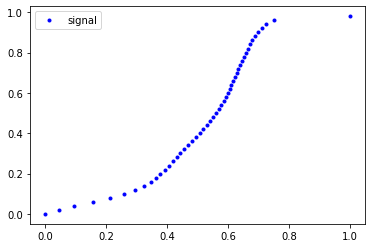

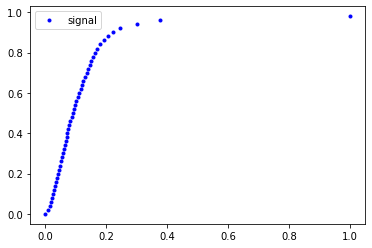

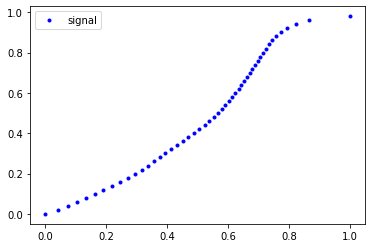

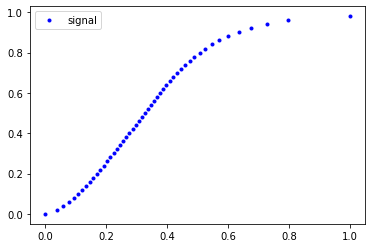

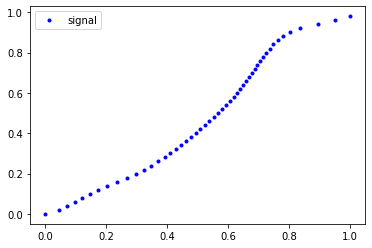

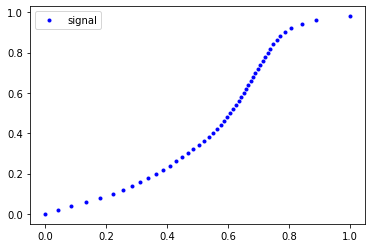

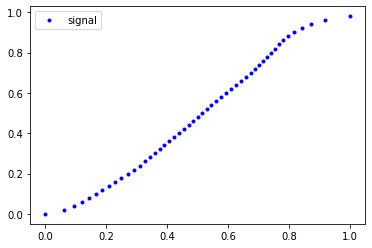

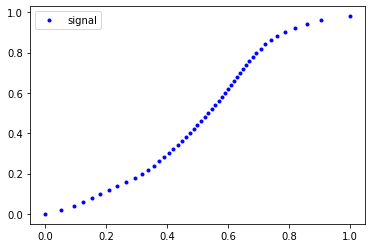

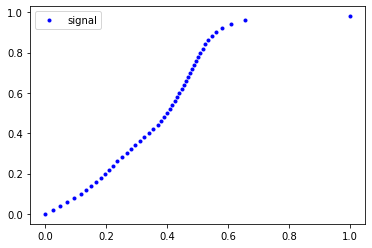

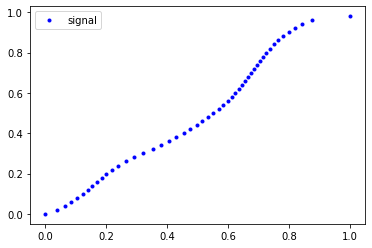

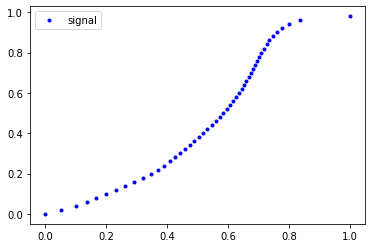

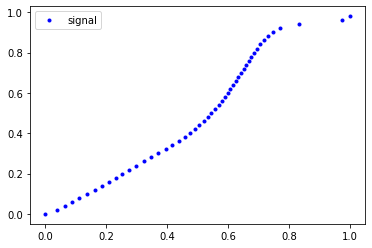

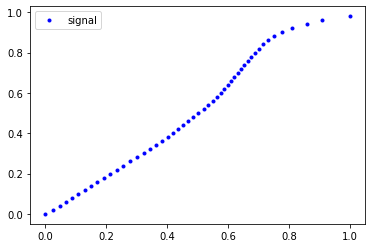

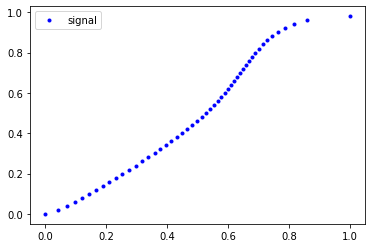

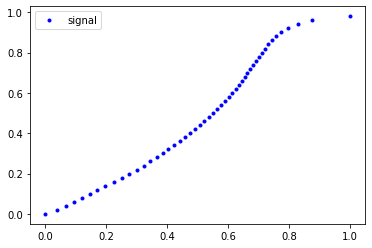

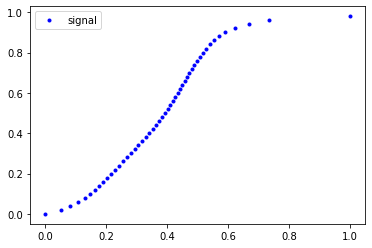

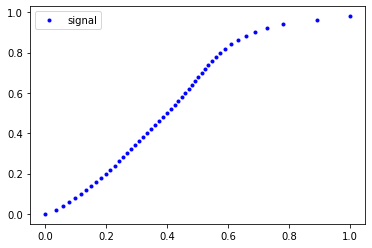

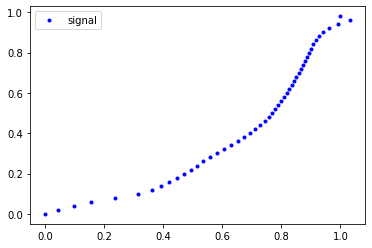

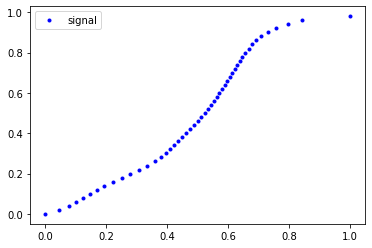

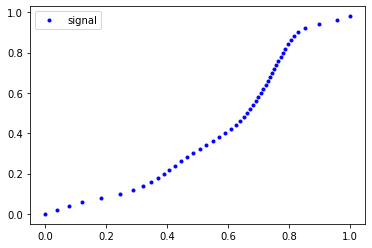

In [91]:
y = [x*0.02 for x in range(50)]
xList = np.array(sig.iloc[:,:50])
for i in range(20):
    plt.plot(xList[i],y, '.', label = 'signal', color = 'blue')
    plt.legend(loc ='upper left')
    plt.show()

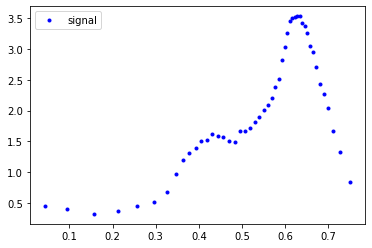

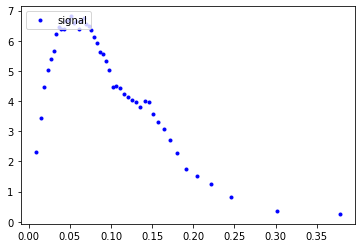

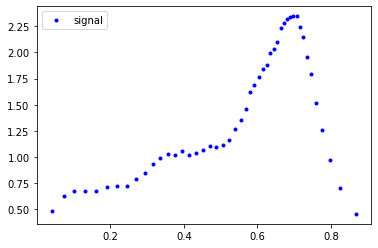

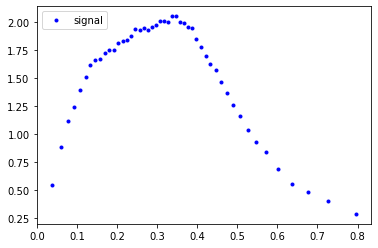

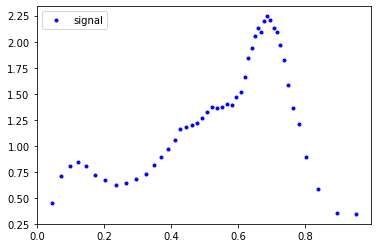

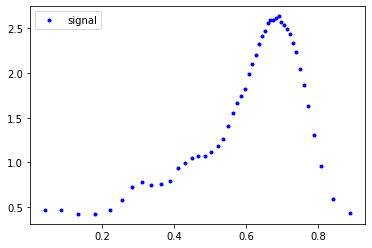

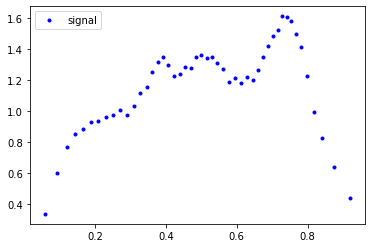

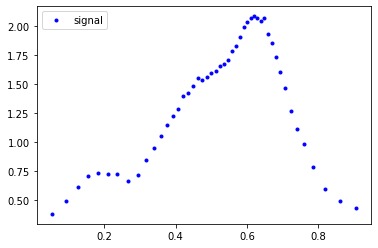

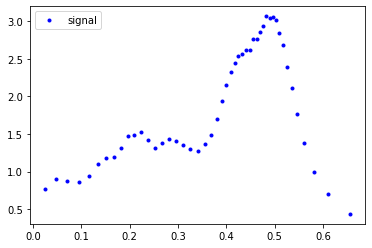

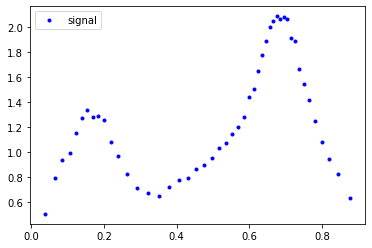

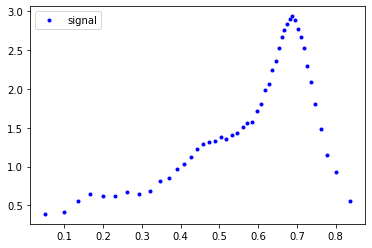

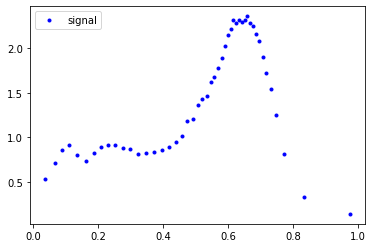

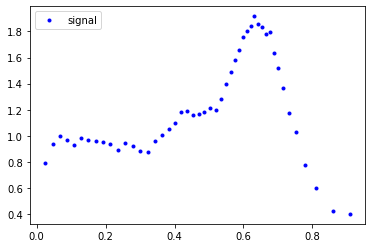

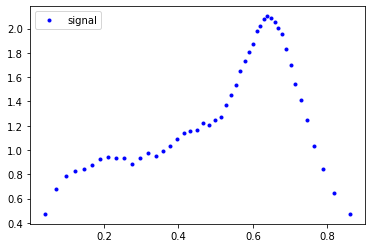

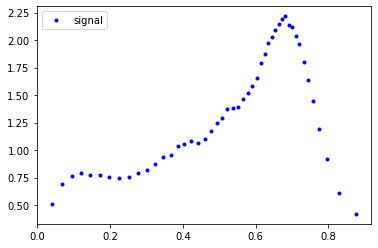

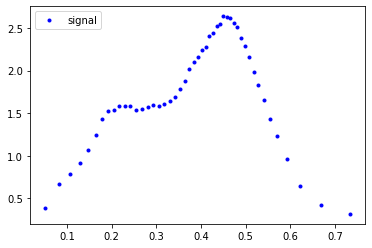

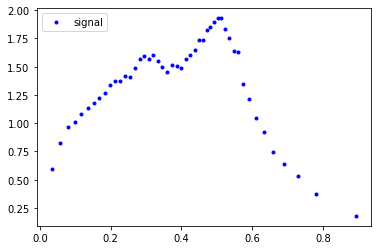

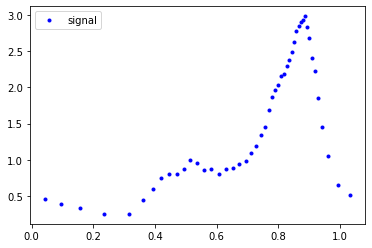

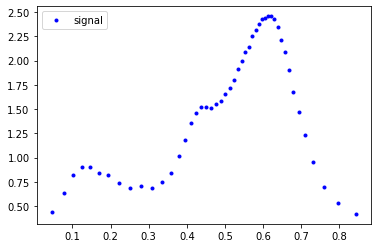

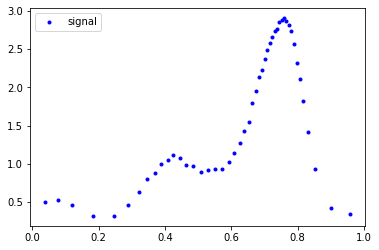

In [92]:
y = np.array(sig.iloc[:,50:])
xList = np.array(sig.iloc[:,1:49])
for i in range(20):
    plt.plot(xList[i],y[i], '.', label = 'signal', color = 'blue')
    plt.legend(loc ='upper left')
    plt.show()

In [93]:
sig

,TimeAtHeightX1,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
0,0,0.044361,0.095117,0.158157,0.213047,0.257228,0.296225,0.325614,0.346224,0.363044,...,3.261032,3.052496,2.948297,2.712170,2.439880,2.268714,2.040135,1.662041,1.323110,0.845058
1,0,0.008589,0.014430,0.018910,0.022891,0.026594,0.030119,0.033327,0.036419,0.039544,...,3.320913,3.082330,2.710328,2.283024,1.732488,1.506395,1.236028,0.805763,0.359455,0.260226
2,0,0.041737,0.073801,0.103252,0.133073,0.162863,0.190822,0.218377,0.245883,0.271225,...,2.345698,2.243307,2.144865,1.960321,1.797387,1.512727,1.254023,0.968580,0.702520,0.455818
3,0,0.036833,0.059463,0.077316,0.093439,0.107795,0.121003,0.133391,0.145389,0.157362,...,1.264448,1.163360,1.039595,0.928542,0.845879,0.688672,0.559020,0.484084,0.401463,0.288967
4,0,0.044630,0.072822,0.097708,0.121547,0.146484,0.174410,0.204121,0.236338,0.267417,...,2.094694,1.969109,1.822022,1.582219,1.359921,1.206870,0.890646,0.585812,0.350209,0.344486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0.043060,0.071931,0.095647,0.116864,0.137902,0.160024,0.183412,0.208212,0.233492,...,2.139062,2.041486,1.946581,1.760655,1.581311,1.354134,1.063043,0.762040,0.544523,0.411549
59996,0,0.054958,0.768203,1.009817,1.079828,1.126310,1.154545,1.175911,1.193763,1.211160,...,2.648446,2.478848,2.347491,2.137340,1.913676,1.614590,1.352165,1.025927,0.604755,0.436055
59997,0,0.038162,0.065148,0.091150,0.120493,0.153257,0.185424,0.217269,0.247245,0.275226,...,2.612670,2.534769,2.395375,2.222820,1.989390,1.734055,1.392761,1.057117,0.627822,0.292960
59998,0,0.036150,0.059735,0.079783,0.097613,0.114040,0.130193,0.146147,0.161963,0.177632,...,1.564031,1.490382,1.400216,1.165915,1.125370,1.046642,0.815766,0.521475,0.290297,0.206324


In [94]:
for i in range(1, 51):
    sig = sig[(sig['TimeAtHeightX' + str(i)] <= 1)]
    sig = sig[(sig['TimeAtHeightX' + str(i)] >= 0)]


In [95]:
sig = sig.reset_index()
sig.drop(sig.columns[[0]], axis  =1, inplace = True)
sig.shape

(57894, 98)

In [96]:
sig.iloc[:,:50]

,TimeAtHeightX1,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,...,TimeAtHeightX41,TimeAtHeightX42,TimeAtHeightX43,TimeAtHeightX44,TimeAtHeightX45,TimeAtHeightX46,TimeAtHeightX47,TimeAtHeightX48,TimeAtHeightX49,TimeAtHeightX50
0,0,0.044361,0.095117,0.158157,0.213047,0.257228,0.296225,0.325614,0.346224,0.363044,...,0.658348,0.665132,0.672506,0.680703,0.689518,0.699322,0.711355,0.726471,0.750138,1
1,0,0.008589,0.014430,0.018910,0.022891,0.026594,0.030119,0.033327,0.036419,0.039544,...,0.163943,0.171323,0.180083,0.191627,0.204904,0.221085,0.245906,0.301545,0.378402,1
2,0,0.041737,0.073801,0.103252,0.133073,0.162863,0.190822,0.218377,0.245883,0.271225,...,0.715044,0.724368,0.734571,0.745698,0.758919,0.774868,0.795516,0.823985,0.867863,1
3,0,0.036833,0.059463,0.077316,0.093439,0.107795,0.121003,0.133391,0.145389,0.157362,...,0.506903,0.526141,0.547680,0.571324,0.600366,0.636143,0.677458,0.727276,0.796488,1
4,0,0.044630,0.072822,0.097708,0.121547,0.146484,0.174410,0.204121,0.236338,0.267417,...,0.726086,0.737063,0.749703,0.764410,0.780982,0.803437,0.837578,0.894687,0.952744,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57889,0,0.034910,0.062978,0.092021,0.124659,0.155018,0.183407,0.216150,0.258220,0.292565,...,0.782035,0.790196,0.799257,0.809051,0.820855,0.834586,0.851007,0.870384,0.894275,1
57890,0,0.043060,0.071931,0.095647,0.116864,0.137902,0.160024,0.183412,0.208212,0.233492,...,0.676707,0.686981,0.698340,0.710988,0.725758,0.744572,0.770817,0.807546,0.856143,1
57891,0,0.038162,0.065148,0.091150,0.120493,0.153257,0.185424,0.217269,0.247245,0.275226,...,0.731648,0.739998,0.748995,0.759049,0.770582,0.784942,0.803862,0.835718,0.903987,1
57892,0,0.036150,0.059735,0.079783,0.097613,0.114040,0.130193,0.146147,0.161963,0.177632,...,0.520285,0.534568,0.551722,0.569494,0.588603,0.613120,0.651473,0.720368,0.817302,1


In [97]:
sig1 = sig.iloc[:,:50]   # отбор из физических соображений 
yList = [x*0.02 for x in range(50)]
k = 0
for i in range(sig1.shape[0]):
    try:
        if auc(sig1.iloc[i,:], yList) > 0.9 or auc(sig1.iloc[i,:], yList) < 0.1 :
            sig = sig.drop(index=[i])
    except ValueError:
        sig = sig.drop(index=[i])
        print(i, end = ', ')
        k+=1
print('k = ', k)

694, 967, 1115, 1144, 1272, 1545, 1561, 2291, 2391, 2423, 2577, 2857, 3256, 3637, 3834, 3996, 4162, 4793, 4816, 4888, 4935, 5070, 5082, 5335, 5383, 5395, 5574, 5641, 6174, 6369, 6549, 6589, 6805, 6873, 7341, 7427, 7871, 7873, 8074, 8262, 8896, 9101, 9383, 9622, 9987, 10043, 10113, 10136, 10668, 10799, 11570, 11987, 12117, 12176, 12200, 12567, 12569, 12623, 12806, 12839, 13344, 13575, 14288, 14596, 14664, 14948, 15242, 15514, 15546, 16209, 16293, 16549, 16676, 16738, 16929, 16975, 17113, 17122, 17217, 17661, 17728, 18023, 18164, 18210, 18589, 18597, 18938, 19186, 19246, 19616, 19757, 19995, 20082, 20116, 20215, 20301, 20649, 20682, 20942, 21362, 21610, 21743, 21747, 21843, 22135, 22535, 22602, 22649, 22702, 22727, 22743, 23329, 23538, 24197, 24335, 24463, 25236, 25325, 25374, 25485, 26084, 26702, 26744, 28026, 28389, 28428, 28450, 28763, 28833, 29308, 29350, 29374, 30013, 30074, 30110, 30373, 31147, 31607, 31651, 31854, 31860, 31989, 32467, 32551, 32618, 32747, 32793, 33058, 33503, 3354

In [98]:
sig = sig.reset_index()
sig.drop(sig.columns[[0]], axis  =1, inplace = True)
sig.shape

(57632, 98)

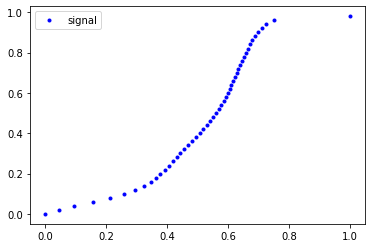

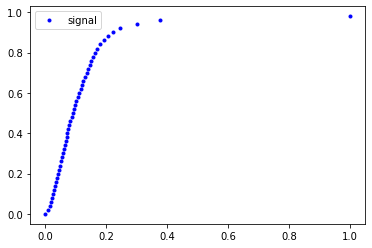

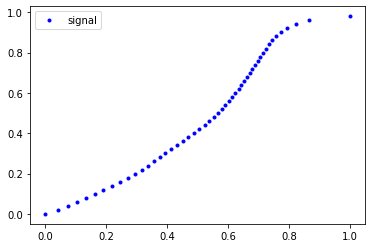

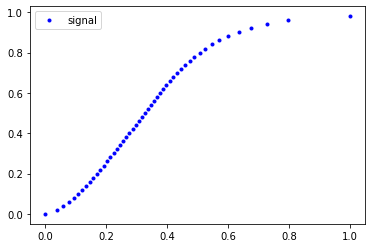

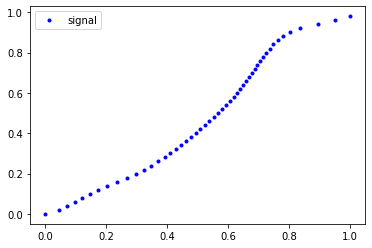

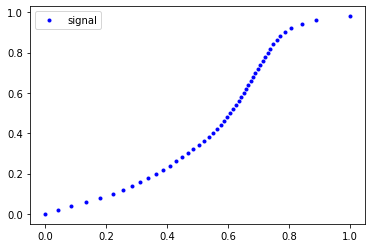

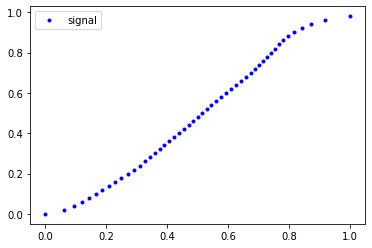

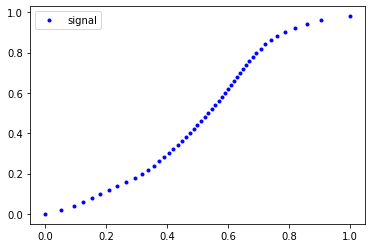

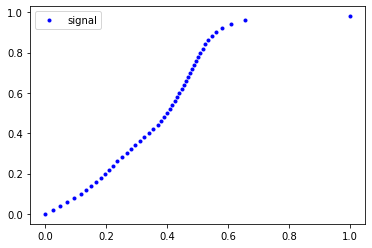

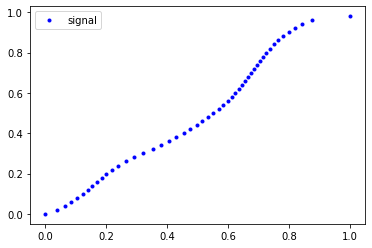

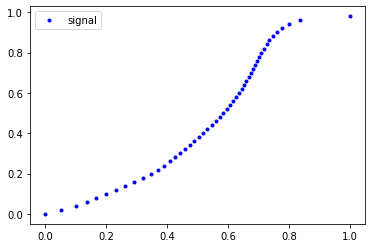

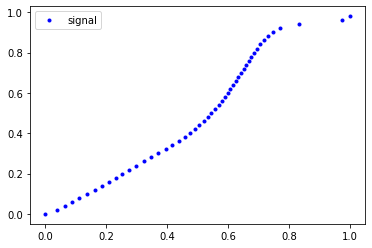

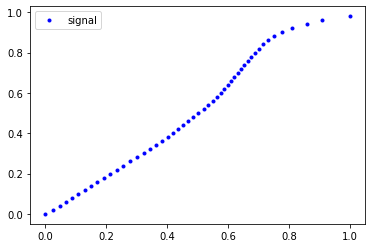

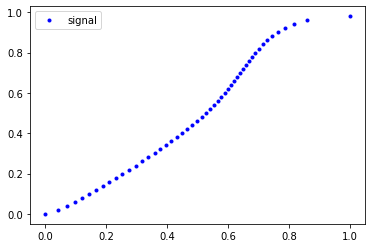

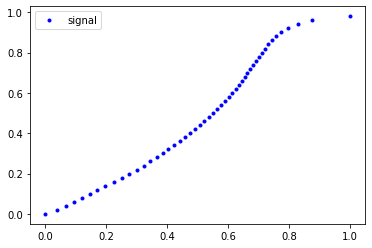

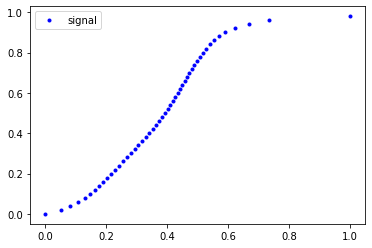

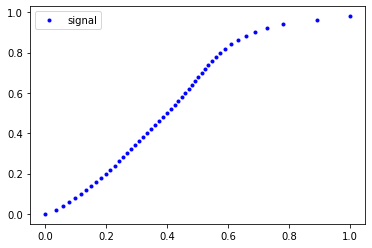

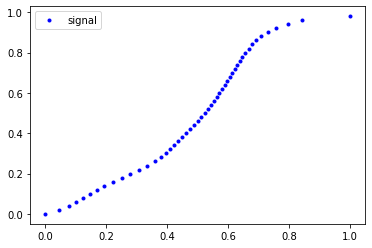

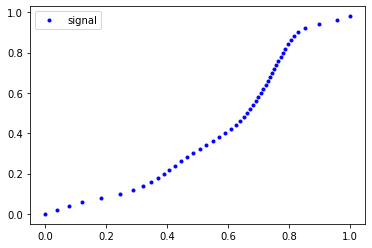

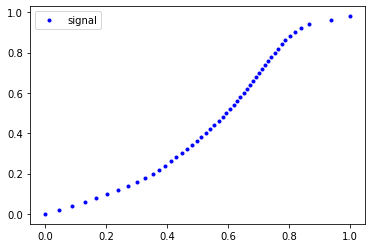

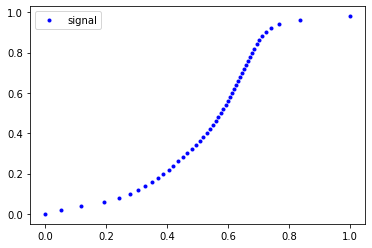

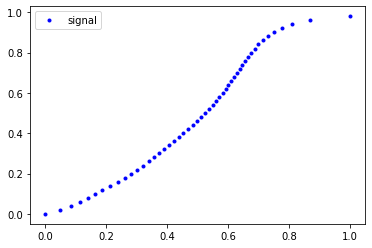

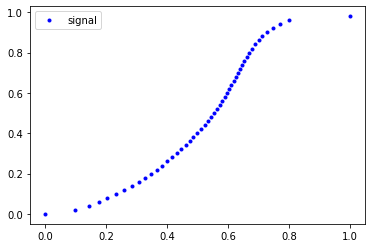

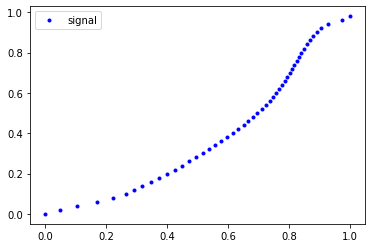

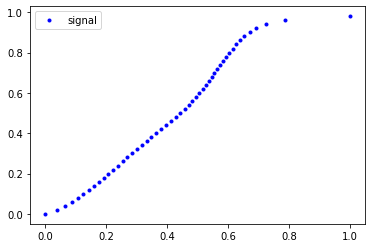

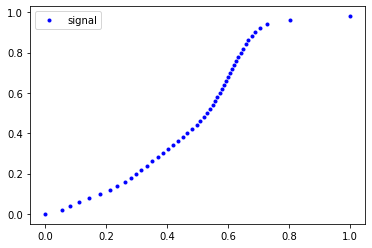

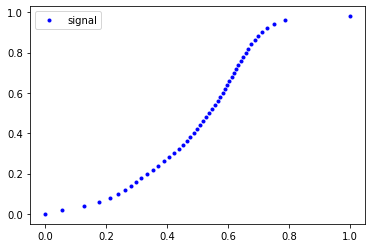

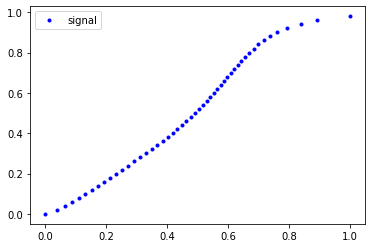

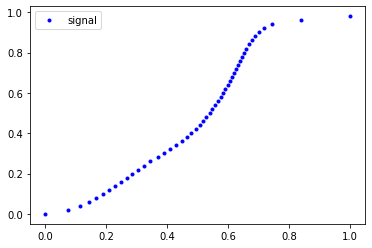

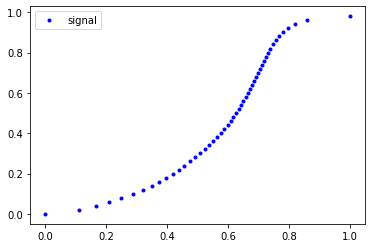

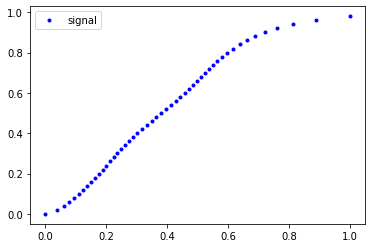

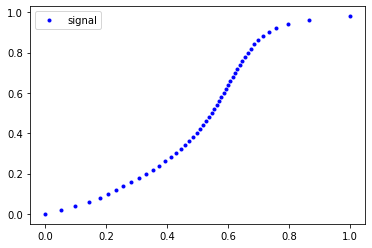

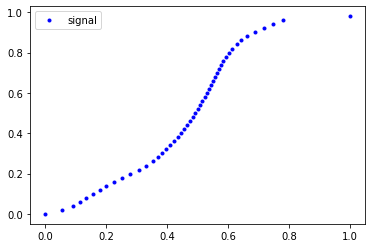

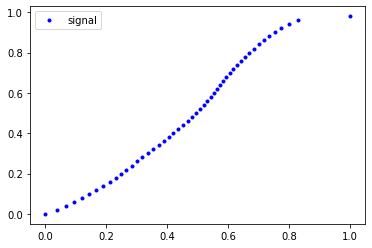

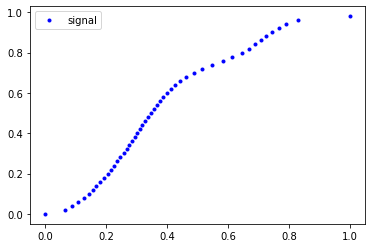

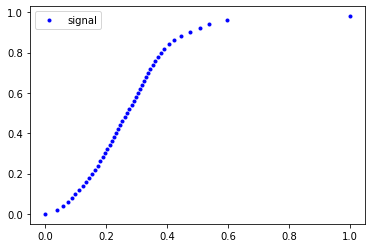

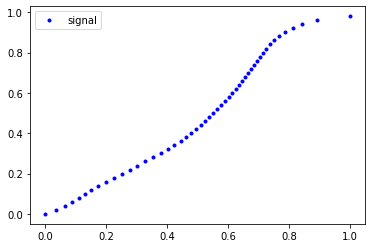

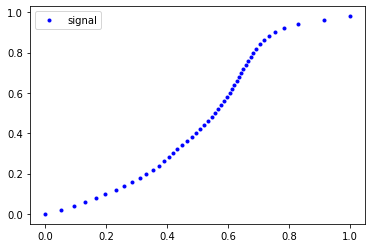

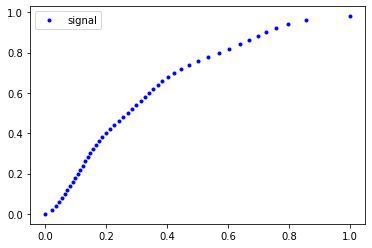

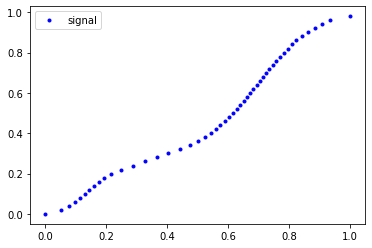

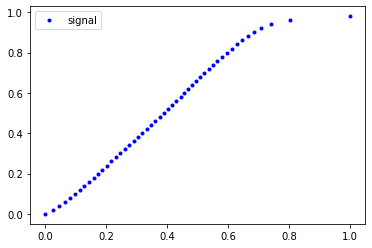

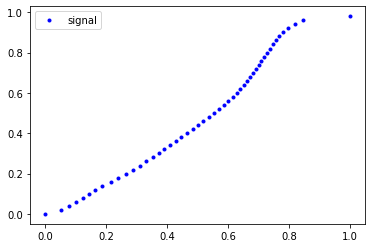

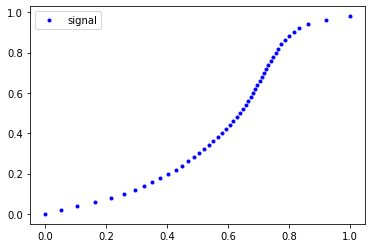

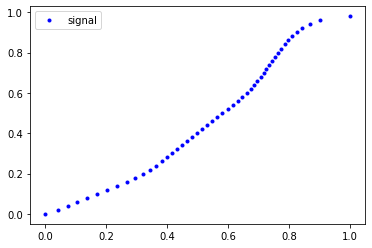

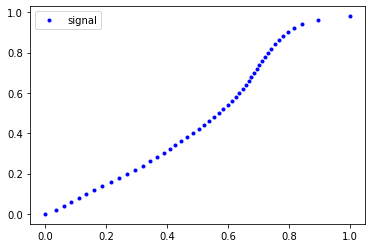

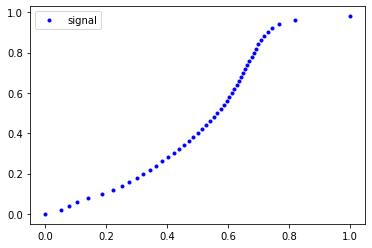

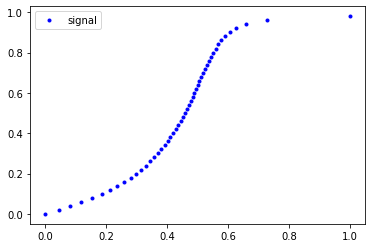

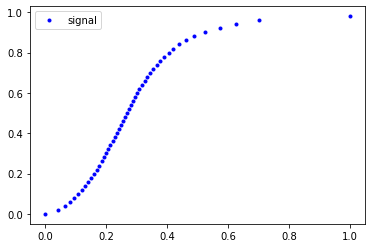

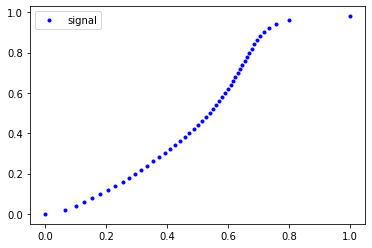

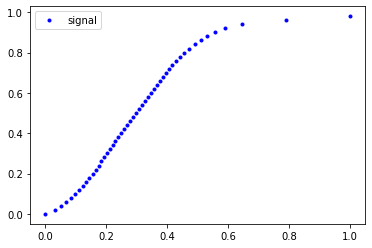

In [99]:
y = [x*0.02 for x in range(50)]
xList = np.array(sig.iloc[:,:50])
for i in range(50):
    plt.plot(xList[i],y, '.', label = 'signal', color = 'blue')
    plt.legend(loc ='upper left')
    plt.show()

In [100]:
sig

,TimeAtHeightX1,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
0,0,0.044361,0.095117,0.158157,0.213047,0.257228,0.296225,0.325614,0.346224,0.363044,...,3.261032,3.052496,2.948297,2.712170,2.439880,2.268714,2.040135,1.662041,1.323110,0.845058
1,0,0.008589,0.014430,0.018910,0.022891,0.026594,0.030119,0.033327,0.036419,0.039544,...,3.320913,3.082330,2.710328,2.283024,1.732488,1.506395,1.236028,0.805763,0.359455,0.260226
2,0,0.041737,0.073801,0.103252,0.133073,0.162863,0.190822,0.218377,0.245883,0.271225,...,2.345698,2.243307,2.144865,1.960321,1.797387,1.512727,1.254023,0.968580,0.702520,0.455818
3,0,0.036833,0.059463,0.077316,0.093439,0.107795,0.121003,0.133391,0.145389,0.157362,...,1.264448,1.163360,1.039595,0.928542,0.845879,0.688672,0.559020,0.484084,0.401463,0.288967
4,0,0.044630,0.072822,0.097708,0.121547,0.146484,0.174410,0.204121,0.236338,0.267417,...,2.094694,1.969109,1.822022,1.582219,1.359921,1.206870,0.890646,0.585812,0.350209,0.344486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57627,0,0.034910,0.062978,0.092021,0.124659,0.155018,0.183407,0.216150,0.258220,0.292565,...,2.774376,2.602224,2.450698,2.207172,2.042001,1.694351,1.456568,1.217939,1.032157,0.837138
57628,0,0.043060,0.071931,0.095647,0.116864,0.137902,0.160024,0.183412,0.208212,0.233492,...,2.139062,2.041486,1.946581,1.760655,1.581311,1.354134,1.063043,0.762040,0.544523,0.411549
57629,0,0.038162,0.065148,0.091150,0.120493,0.153257,0.185424,0.217269,0.247245,0.275226,...,2.612670,2.534769,2.395375,2.222820,1.989390,1.734055,1.392761,1.057117,0.627822,0.292960
57630,0,0.036150,0.059735,0.079783,0.097613,0.114040,0.130193,0.146147,0.161963,0.177632,...,1.564031,1.490382,1.400216,1.165915,1.125370,1.046642,0.815766,0.521475,0.290297,0.206324


осталось  57633
осталось  52633
осталось  47633
осталось  42633
осталось  37633
осталось  32633
осталось  27633
осталось  22633
осталось  17633
осталось  12633
осталось  7633
осталось  2633


Text(0.5, 1.0, 'ANG5')

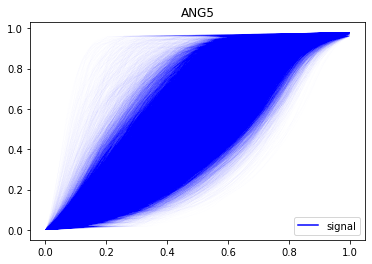

In [98]:
yList = [x*0.02 for x in range(50)] 
xList = sig.iloc[sig.shape[0]-1,:50]
plt.plot(xList,yList, color='red')
plt.plot(xList,yList, color='blue',
             label = 'signal')
plt.plot(xList,yList, color='white', linewidth = 20)




for h in range (sig.shape[0]-2):
    xList = sig.iloc[h,:50]
    plt.plot(xList,yList, color='blue', linewidth=0.1,  alpha=0.05)
    
    if (h%5000 == 0):
        print('осталось  '+str(sig.shape[0]-h))
        
        
plt.legend(loc = 'lower right')        
plt.title('ANG5')

### 7.2. Отбор для bkg

In [101]:
bkg = pd.read_csv('simulated_background.csv')
bkg.drop(bkg.columns[[0]], axis  =1, inplace = True)

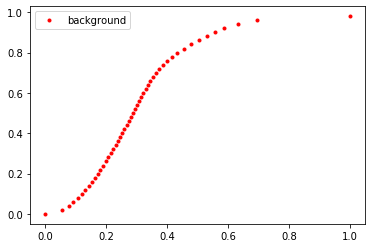

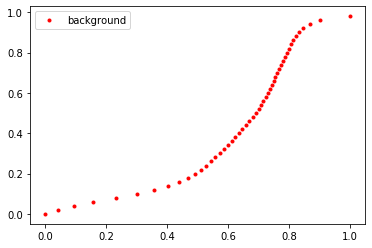

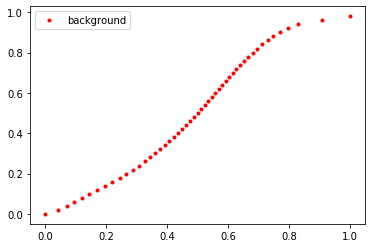

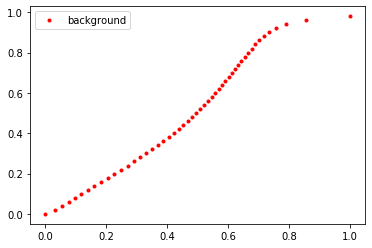

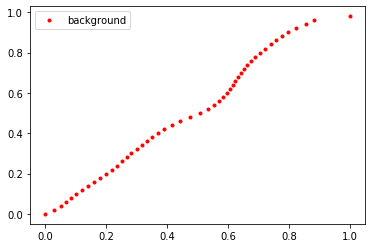

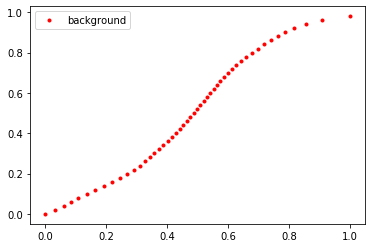

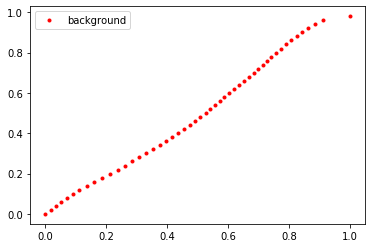

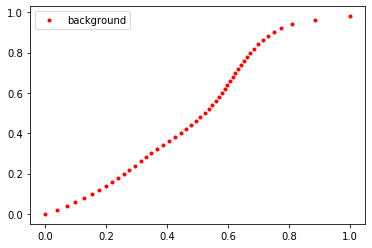

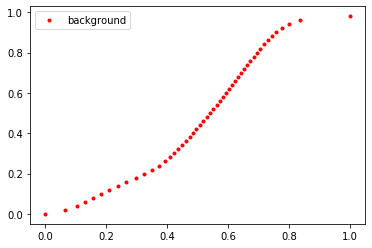

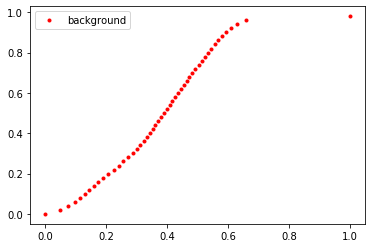

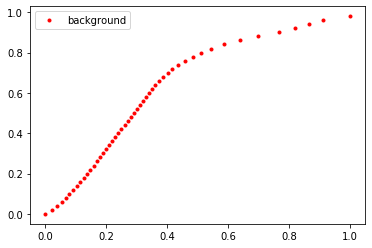

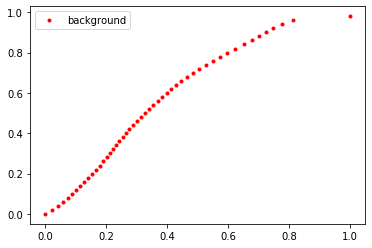

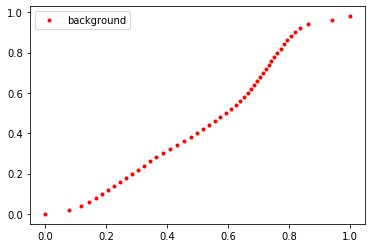

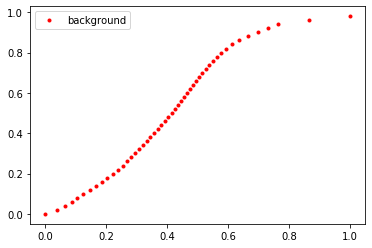

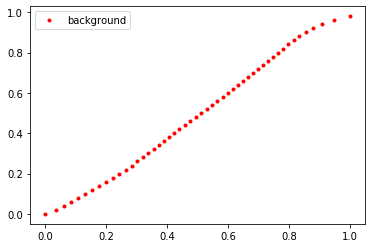

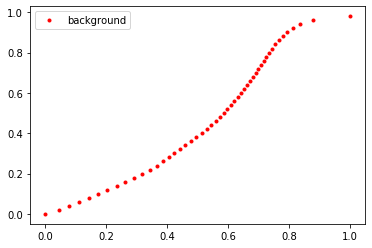

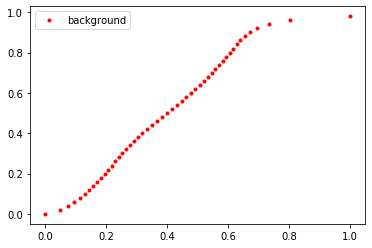

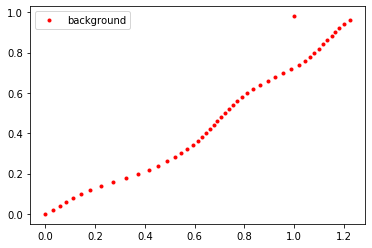

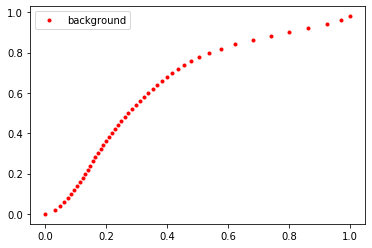

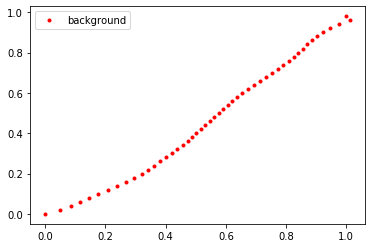

In [102]:
y = [x*0.02 for x in range(50)]
xList = np.array(bkg.iloc[:,:50])
for i in range(20):
    plt.plot(xList[i],y, '.', label = 'background', color = 'red')
    plt.legend(loc ='upper left')
    plt.show()

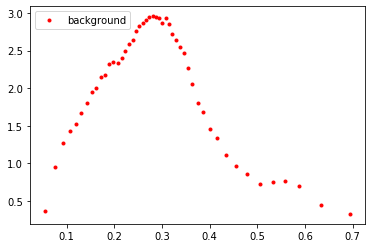

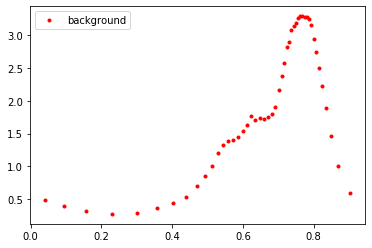

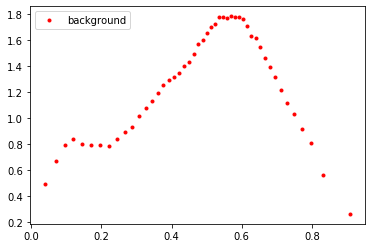

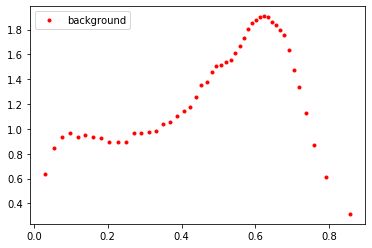

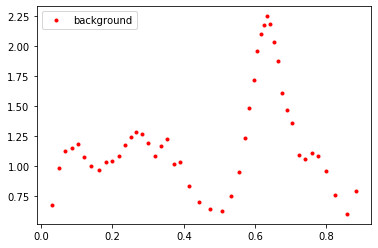

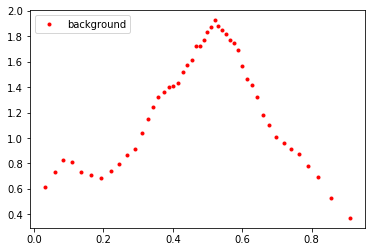

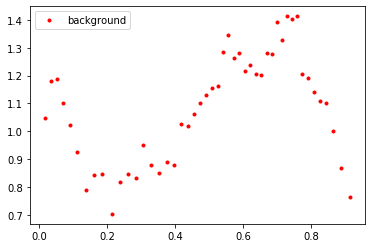

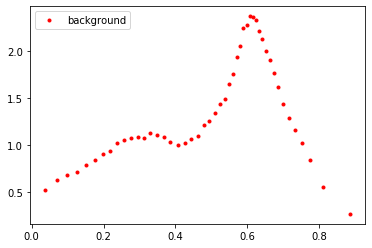

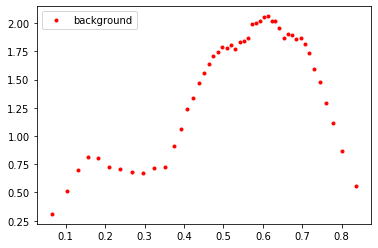

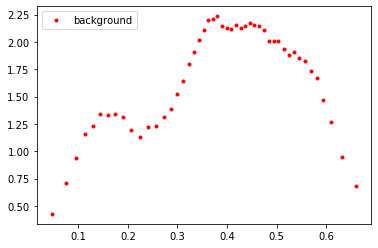

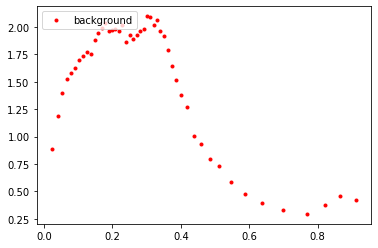

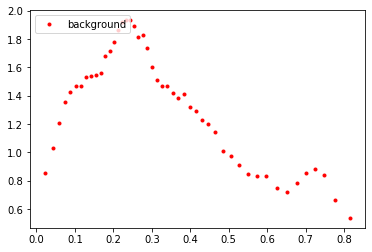

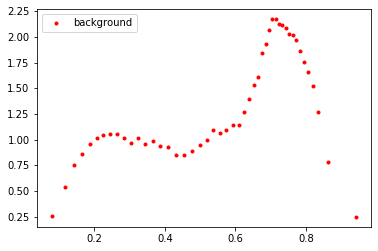

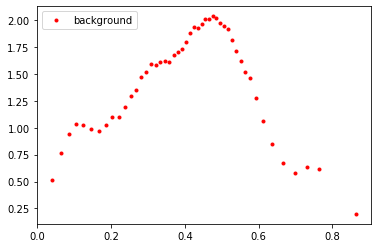

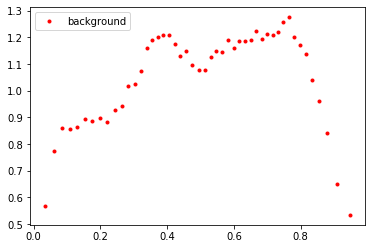

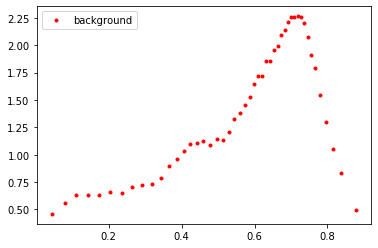

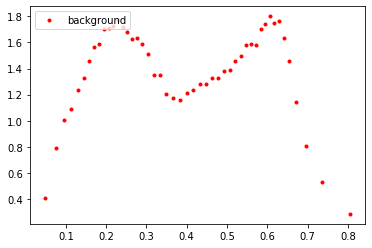

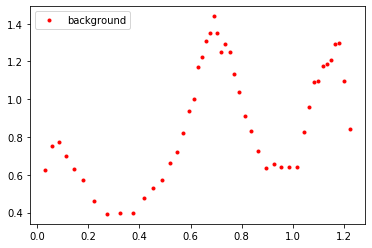

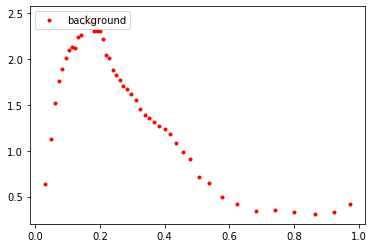

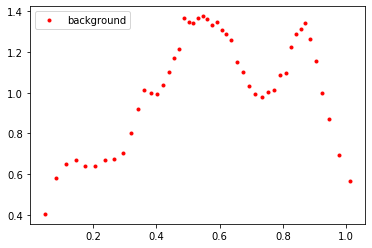

In [103]:
y = np.array(bkg.iloc[:,50:])
xList = np.array(bkg.iloc[:,1:49])
for i in range(20):
    plt.plot(xList[i],y[i], '.', label = 'background', color = 'red')
    plt.legend(loc ='upper left')
    plt.show()

In [104]:
bkg

,TimeAtHeightX1,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
0,0,0.055755,0.076683,0.092382,0.106367,0.119486,0.131421,0.142509,0.152799,0.162801,...,1.341480,1.108015,0.963341,0.851557,0.728231,0.745526,0.765684,0.696833,0.438576,0.325764
1,0,0.042080,0.093228,0.156693,0.230887,0.300032,0.356330,0.402715,0.440541,0.469483,...,3.253283,3.156752,2.940739,2.739847,2.509943,2.219859,1.886252,1.463405,0.995985,0.592167
2,0,0.040712,0.070616,0.095890,0.119650,0.144593,0.169713,0.195024,0.220563,0.244365,...,1.464000,1.396569,1.320005,1.219670,1.119516,1.030749,0.919434,0.807540,0.561128,0.263045
3,0,0.031284,0.054888,0.076290,0.097045,0.118441,0.139524,0.160930,0.182433,0.204800,...,1.836224,1.794466,1.758959,1.632497,1.473877,1.335050,1.126868,0.872168,0.609061,0.314758
4,0,0.029833,0.050225,0.067967,0.085364,0.102253,0.120901,0.140940,0.161643,0.180954,...,1.471892,1.361169,1.091597,1.056423,1.110703,1.084438,0.958549,0.760913,0.599987,0.789555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0.036452,0.059447,0.077652,0.094275,0.110435,0.126432,0.142379,0.157990,0.173635,...,1.170551,1.062692,0.933718,0.827422,0.738681,0.643670,0.559041,0.497756,0.475284,0.439610
59996,0,0.037460,0.061971,0.080805,0.097298,0.112686,0.128099,0.142903,0.157266,0.171493,...,0.913462,0.839473,0.670163,0.449602,0.283461,0.144242,0.154569,0.377862,0.725794,0.548166
59997,0,0.045551,0.075094,0.099289,0.120287,0.139726,0.157824,0.175347,0.191973,0.208276,...,0.809259,0.780026,0.734883,0.696725,0.715136,0.731703,0.715519,0.677008,0.628817,0.448906
59998,0,0.017389,0.033395,0.048352,0.064819,0.082793,0.103359,0.125756,0.144527,0.162204,...,1.011657,1.139093,1.073319,1.094798,1.112963,1.123584,1.040938,0.801556,0.524891,0.527781


In [105]:
for i in range(1, 51):
    bkg = bkg[(bkg['TimeAtHeightX' + str(i)] <= 1)]
    bkg = bkg[(bkg['TimeAtHeightX' + str(i)] >= 0)]

In [106]:
bkg = bkg.reset_index()
bkg.drop(bkg.columns[[0]], axis  =1, inplace = True)
bkg.shape

(53801, 98)

In [107]:
bkg1 = bkg.iloc[:,:50]
yList = [x*0.02 for x in range(50)]
k = 0
for i in range(bkg1.shape[0]):
    try:
        if auc(bkg1.iloc[i,:], yList) > 0.9 or auc(bkg1.iloc[i,:], yList) < 0.1:
            bkg = bkg.drop(index=[i])
    except ValueError:
        bkg = bkg.drop(index=[i])
        print(i, end = ', ')
        k+=1
print('k = ', k)

57, 251, 713, 1259, 1390, 1856, 1996, 2118, 2204, 2557, 3342, 3347, 3536, 3684, 4213, 4543, 4891, 5550, 5823, 6117, 6220, 6429, 6788, 7402, 7626, 7749, 7770, 7821, 7931, 8044, 8148, 8375, 8834, 9000, 9221, 9427, 9480, 10390, 11129, 11695, 11881, 12025, 12640, 12968, 12994, 13026, 13297, 13681, 13699, 13733, 13918, 13993, 14163, 14358, 14511, 14632, 14750, 15428, 16422, 16498, 16564, 16571, 16593, 17215, 17858, 17883, 18001, 18852, 18978, 19057, 19165, 19452, 20081, 20189, 20674, 20750, 20786, 20810, 21169, 21249, 21317, 21344, 21780, 22151, 23116, 23242, 24216, 24319, 24482, 24703, 24808, 24882, 25257, 25359, 25534, 25538, 25861, 26366, 26495, 26602, 26630, 26821, 27207, 27292, 27761, 27966, 28079, 28080, 28277, 28328, 28402, 28599, 29058, 29653, 29890, 30056, 30229, 30482, 30951, 31270, 31427, 31442, 31584, 31894, 32085, 32264, 32421, 32779, 32898, 33039, 33577, 33874, 34500, 34926, 35157, 35529, 35907, 36255, 37259, 37825, 38043, 38094, 39048, 39060, 39169, 39463, 40109, 40353, 40391

In [108]:
bkg = bkg.reset_index()
bkg.drop(bkg.columns[[0]], axis  =1, inplace = True)
bkg.shape

(53608, 98)

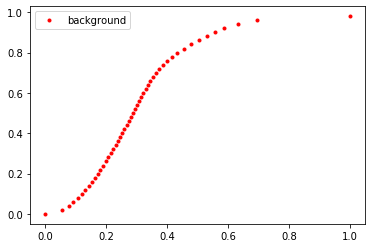

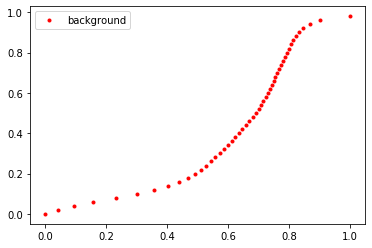

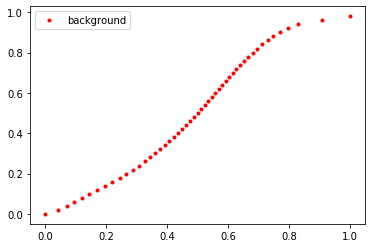

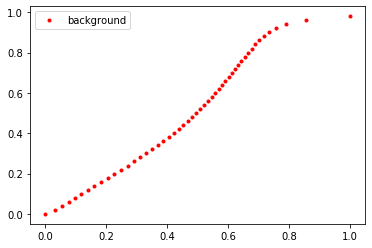

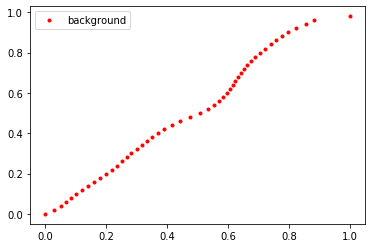

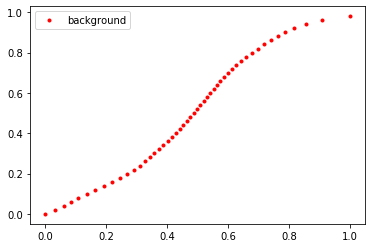

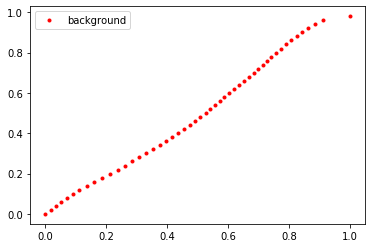

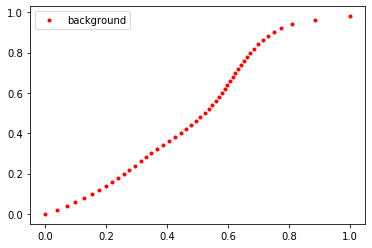

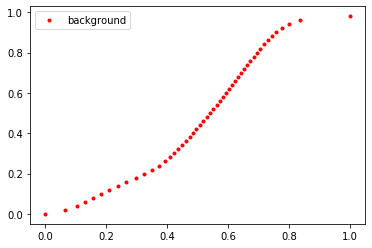

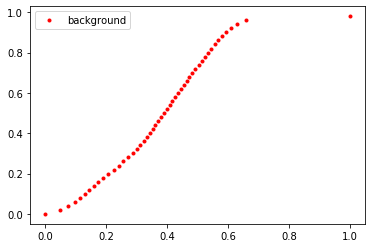

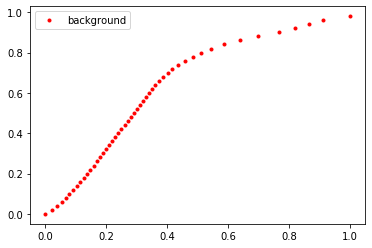

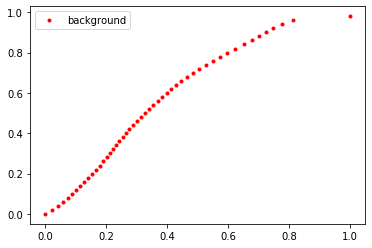

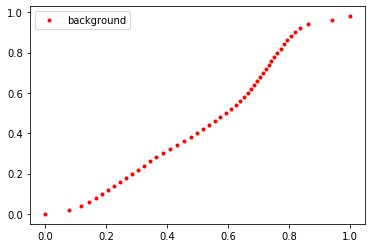

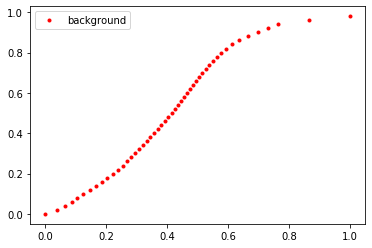

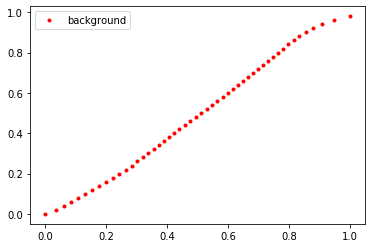

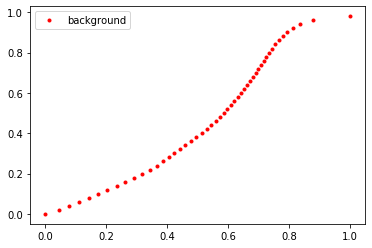

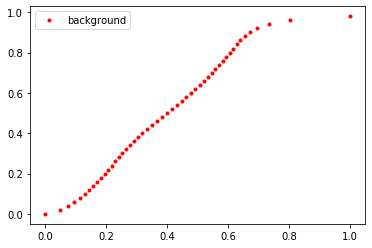

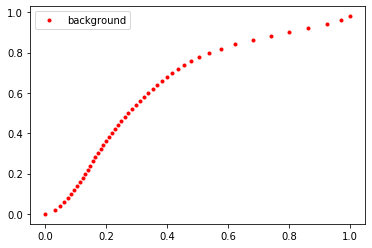

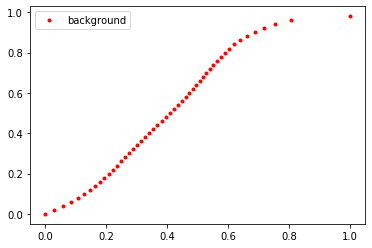

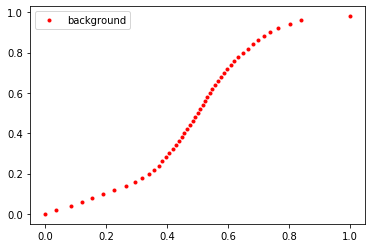

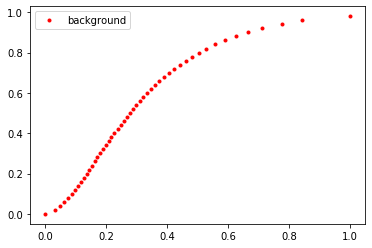

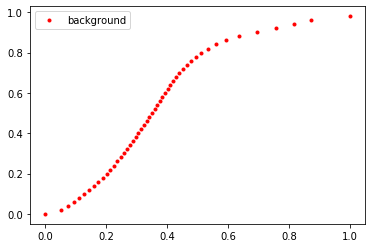

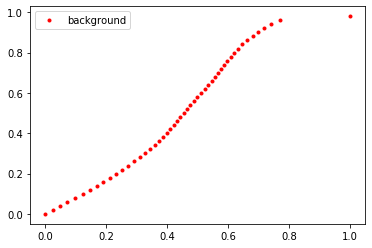

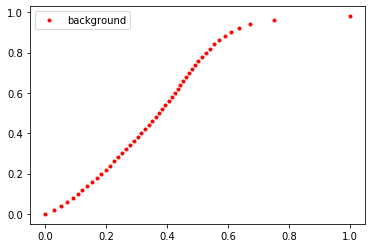

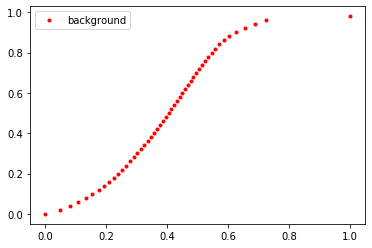

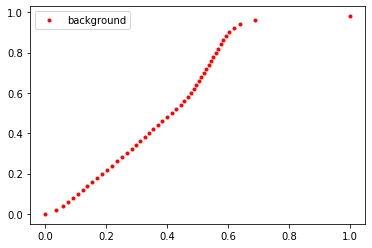

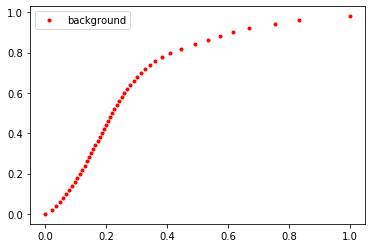

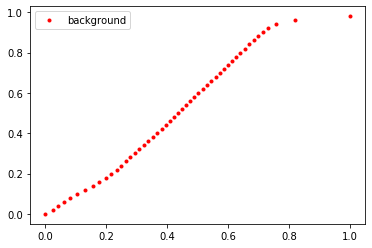

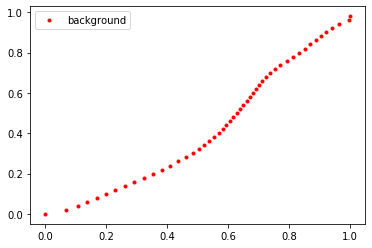

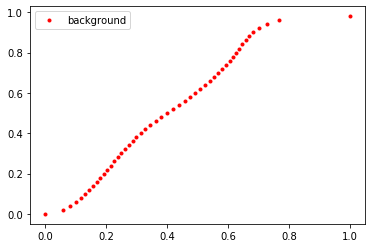

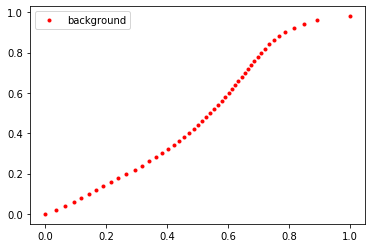

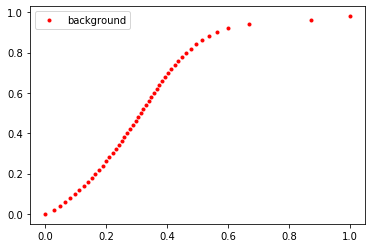

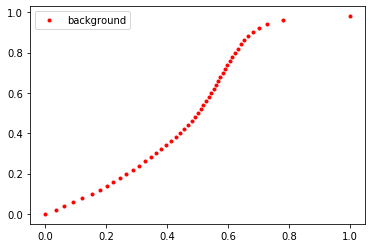

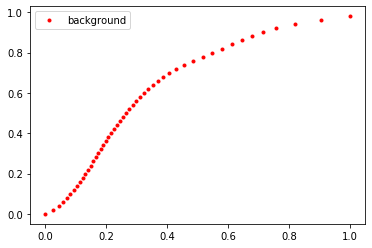

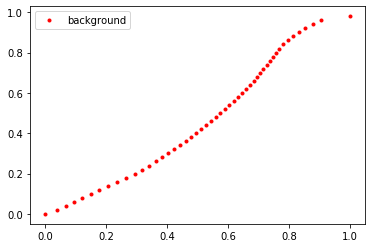

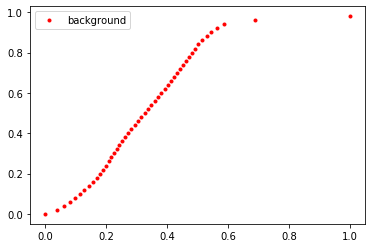

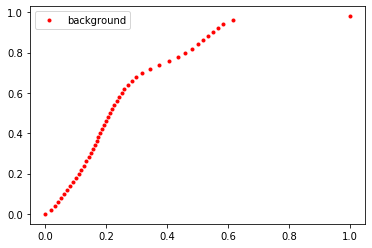

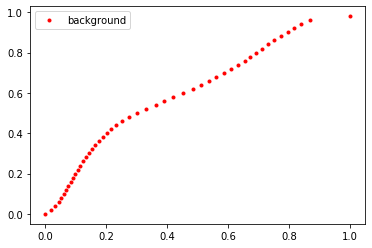

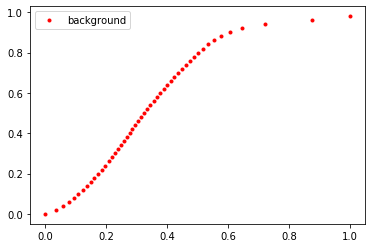

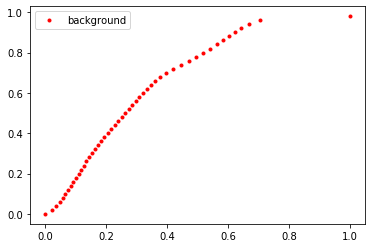

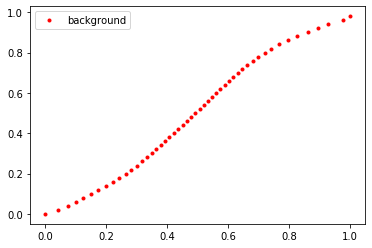

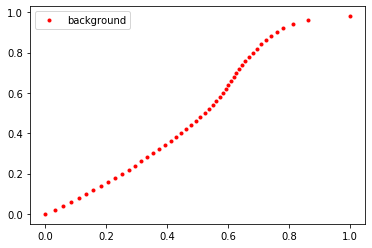

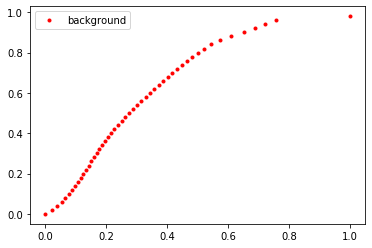

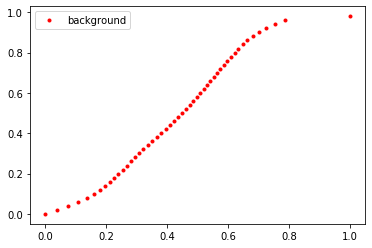

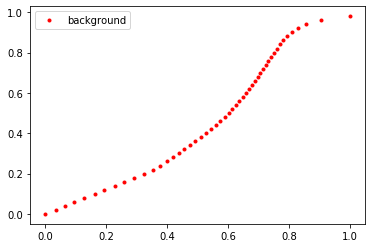

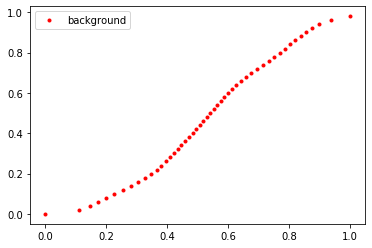

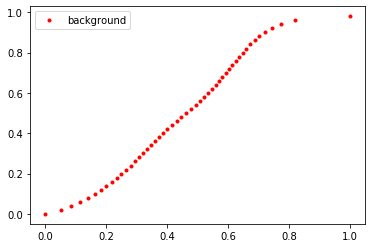

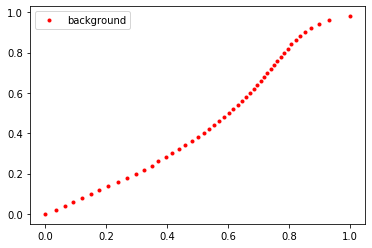

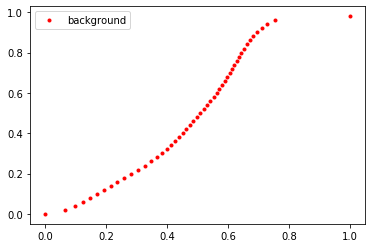

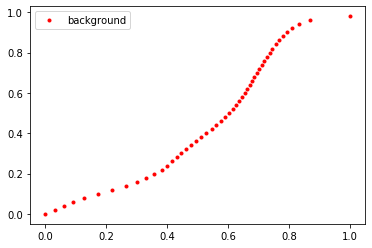

In [109]:
y = [x*0.02 for x in range(50)]
xList = np.array(bkg.iloc[:,:50])
for i in range(50):
    plt.plot(xList[i],y, '.', label = 'background', color = 'red')
    plt.legend(loc ='upper left')
    plt.show()

In [110]:
bkg

,TimeAtHeightX1,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
0,0,0.055755,0.076683,0.092382,0.106367,0.119486,0.131421,0.142509,0.152799,0.162801,...,1.341480,1.108015,0.963341,0.851557,0.728231,0.745526,0.765684,0.696833,0.438576,0.325764
1,0,0.042080,0.093228,0.156693,0.230887,0.300032,0.356330,0.402715,0.440541,0.469483,...,3.253283,3.156752,2.940739,2.739847,2.509943,2.219859,1.886252,1.463405,0.995985,0.592167
2,0,0.040712,0.070616,0.095890,0.119650,0.144593,0.169713,0.195024,0.220563,0.244365,...,1.464000,1.396569,1.320005,1.219670,1.119516,1.030749,0.919434,0.807540,0.561128,0.263045
3,0,0.031284,0.054888,0.076290,0.097045,0.118441,0.139524,0.160930,0.182433,0.204800,...,1.836224,1.794466,1.758959,1.632497,1.473877,1.335050,1.126868,0.872168,0.609061,0.314758
4,0,0.029833,0.050225,0.067967,0.085364,0.102253,0.120901,0.140940,0.161643,0.180954,...,1.471892,1.361169,1.091597,1.056423,1.110703,1.084438,0.958549,0.760913,0.599987,0.789555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53603,0,0.035990,0.058350,0.077057,0.094282,0.111318,0.127929,0.144589,0.161491,0.179448,...,1.794986,1.665404,1.538333,1.444352,1.314600,1.227529,1.073831,0.935907,0.698844,0.356494
53604,0,0.036452,0.059447,0.077652,0.094275,0.110435,0.126432,0.142379,0.157990,0.173635,...,1.170551,1.062692,0.933718,0.827422,0.738681,0.643670,0.559041,0.497756,0.475284,0.439610
53605,0,0.045551,0.075094,0.099289,0.120287,0.139726,0.157824,0.175347,0.191973,0.208276,...,0.809259,0.780026,0.734883,0.696725,0.715136,0.731703,0.715519,0.677008,0.628817,0.448906
53606,0,0.017389,0.033395,0.048352,0.064819,0.082793,0.103359,0.125756,0.144527,0.162204,...,1.011657,1.139093,1.073319,1.094798,1.112963,1.123584,1.040938,0.801556,0.524891,0.527781


осталось  53622
осталось  48622
осталось  43622
осталось  38622
осталось  33622
осталось  28622
осталось  23622
осталось  18622
осталось  13622
осталось  8622
осталось  3622


Text(0.5, 1.0, 'ANG5')

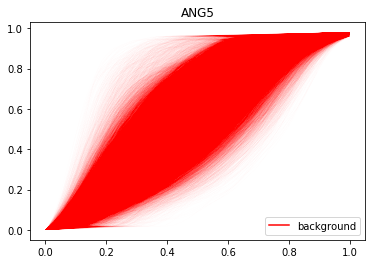

In [97]:
yList = [x*0.02 for x in range(50)] # попробовать pandas
xList = bkg.iloc[bkg.shape[0]-1,:50]
plt.plot(xList,yList, color='blue')
plt.plot(xList,yList, color='red',
             label = 'background')
plt.plot(xList,yList, color='white', linewidth = 20)




for h in range (bkg.shape[0]-2):
    xList = bkg.iloc[h,:50]
    plt.plot(xList,yList, color='red', linewidth=0.1,  alpha=0.05)
    
    if (h%5000 == 0):
        print('осталось  '+str(bkg.shape[0]-h))
        
        
plt.legend(loc = 'lower right')        
plt.title('ANG5')

### 7.3. Сохранение


In [111]:
sig['label'] = 1  
bkg['label'] = 0

In [112]:
sig

,TimeAtHeightX1,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,...,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48,label
0,0,0.044361,0.095117,0.158157,0.213047,0.257228,0.296225,0.325614,0.346224,0.363044,...,3.052496,2.948297,2.712170,2.439880,2.268714,2.040135,1.662041,1.323110,0.845058,1
1,0,0.008589,0.014430,0.018910,0.022891,0.026594,0.030119,0.033327,0.036419,0.039544,...,3.082330,2.710328,2.283024,1.732488,1.506395,1.236028,0.805763,0.359455,0.260226,1
2,0,0.041737,0.073801,0.103252,0.133073,0.162863,0.190822,0.218377,0.245883,0.271225,...,2.243307,2.144865,1.960321,1.797387,1.512727,1.254023,0.968580,0.702520,0.455818,1
3,0,0.036833,0.059463,0.077316,0.093439,0.107795,0.121003,0.133391,0.145389,0.157362,...,1.163360,1.039595,0.928542,0.845879,0.688672,0.559020,0.484084,0.401463,0.288967,1
4,0,0.044630,0.072822,0.097708,0.121547,0.146484,0.174410,0.204121,0.236338,0.267417,...,1.969109,1.822022,1.582219,1.359921,1.206870,0.890646,0.585812,0.350209,0.344486,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57627,0,0.034910,0.062978,0.092021,0.124659,0.155018,0.183407,0.216150,0.258220,0.292565,...,2.602224,2.450698,2.207172,2.042001,1.694351,1.456568,1.217939,1.032157,0.837138,1
57628,0,0.043060,0.071931,0.095647,0.116864,0.137902,0.160024,0.183412,0.208212,0.233492,...,2.041486,1.946581,1.760655,1.581311,1.354134,1.063043,0.762040,0.544523,0.411549,1
57629,0,0.038162,0.065148,0.091150,0.120493,0.153257,0.185424,0.217269,0.247245,0.275226,...,2.534769,2.395375,2.222820,1.989390,1.734055,1.392761,1.057117,0.627822,0.292960,1
57630,0,0.036150,0.059735,0.079783,0.097613,0.114040,0.130193,0.146147,0.161963,0.177632,...,1.490382,1.400216,1.165915,1.125370,1.046642,0.815766,0.521475,0.290297,0.206324,1


In [113]:
data = pd.concat([sig,bkg])

In [114]:
data = data.reset_index()
data.drop(data.columns[[0]], axis  =1, inplace = True)

In [115]:
data

,TimeAtHeightX1,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,...,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48,label
0,0,0.044361,0.095117,0.158157,0.213047,0.257228,0.296225,0.325614,0.346224,0.363044,...,3.052496,2.948297,2.712170,2.439880,2.268714,2.040135,1.662041,1.323110,0.845058,1
1,0,0.008589,0.014430,0.018910,0.022891,0.026594,0.030119,0.033327,0.036419,0.039544,...,3.082330,2.710328,2.283024,1.732488,1.506395,1.236028,0.805763,0.359455,0.260226,1
2,0,0.041737,0.073801,0.103252,0.133073,0.162863,0.190822,0.218377,0.245883,0.271225,...,2.243307,2.144865,1.960321,1.797387,1.512727,1.254023,0.968580,0.702520,0.455818,1
3,0,0.036833,0.059463,0.077316,0.093439,0.107795,0.121003,0.133391,0.145389,0.157362,...,1.163360,1.039595,0.928542,0.845879,0.688672,0.559020,0.484084,0.401463,0.288967,1
4,0,0.044630,0.072822,0.097708,0.121547,0.146484,0.174410,0.204121,0.236338,0.267417,...,1.969109,1.822022,1.582219,1.359921,1.206870,0.890646,0.585812,0.350209,0.344486,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111235,0,0.035990,0.058350,0.077057,0.094282,0.111318,0.127929,0.144589,0.161491,0.179448,...,1.665404,1.538333,1.444352,1.314600,1.227529,1.073831,0.935907,0.698844,0.356494,0
111236,0,0.036452,0.059447,0.077652,0.094275,0.110435,0.126432,0.142379,0.157990,0.173635,...,1.062692,0.933718,0.827422,0.738681,0.643670,0.559041,0.497756,0.475284,0.439610,0
111237,0,0.045551,0.075094,0.099289,0.120287,0.139726,0.157824,0.175347,0.191973,0.208276,...,0.780026,0.734883,0.696725,0.715136,0.731703,0.715519,0.677008,0.628817,0.448906,0
111238,0,0.017389,0.033395,0.048352,0.064819,0.082793,0.103359,0.125756,0.144527,0.162204,...,1.139093,1.073319,1.094798,1.112963,1.123584,1.040938,0.801556,0.524891,0.527781,0


In [116]:
data.to_csv('example.csv')